# Homework #2

## Executive Summary

To determine what patterns can be seen in network traffic, we are analyzing February 20, 21, 22, and 23 of 2018. This dataset contains the network traffic from the University of New Brunswick servers with details about said traffic and a label showing if it was malicious traffic or not. To get the dataset go to https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csvLinks.


In our analysis, we had the following findings : 


1) 


2)


3) 

## Loading Data

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

2023-05-04 02:17:42.410163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 02:17:42.770638: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-04 02:17:43.975076: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-04 02:17:43.975219: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [2]:
# Check if a pickled version of the concatenated data exists and load it if it does
if os.path.exists('DataSets/network_data.pkl'):
    network_data = pd.read_pickle('DataSets/network_data.pkl')
else:
    # Load the datasets and concatenate them
    # timestap is in the format of YYYY-MM-DD HH:MM:SS
    network_data_20 = pd.read_csv('DataSets/02-20-2018.csv', parse_dates=['Timestamp'])
    network_data_21 = pd.read_csv('DataSets/02-21-2018.csv', parse_dates=['Timestamp'])
    network_data_22 = pd.read_csv('DataSets/02-22-2018.csv', parse_dates=['Timestamp'])
    network_data_23 = pd.read_csv('DataSets/02-23-2018.csv', parse_dates=['Timestamp'])
    network_data = pd.concat([network_data_20, network_data_21, network_data_22, network_data_23], sort=True)
    
    # Pickle the concatenated data for future use
    network_data.to_pickle('DataSets/network_data.pkl')

In [ ]:
#Checking data
print(network_data.shape)

# check the number of rows and columns
print('Number of Rows (Samples): %s' % str((network_data.shape[0])))
print('Number of Columns (Features): %s\n' % str((network_data.shape[1])))

In [ ]:
# Check the lines of data
print('Head of Data\n')
print(network_data.head())

In [ ]:
#Checking Each Column
print('Total columns in our data: %s' % str(len(network_data.columns)))

print(network_data.info())

In [3]:
network_data = network_data.dropna(subset=['Label'])
network_data = network_data.fillna(0)

## Data Visualization

To get a decent grasp of what kind of content we have to analyze, we first analyzed the distribution of attacks. From this we uncovered that most of the traffic was Benign, with DDoS attacks being the most represented malicious attacks. 

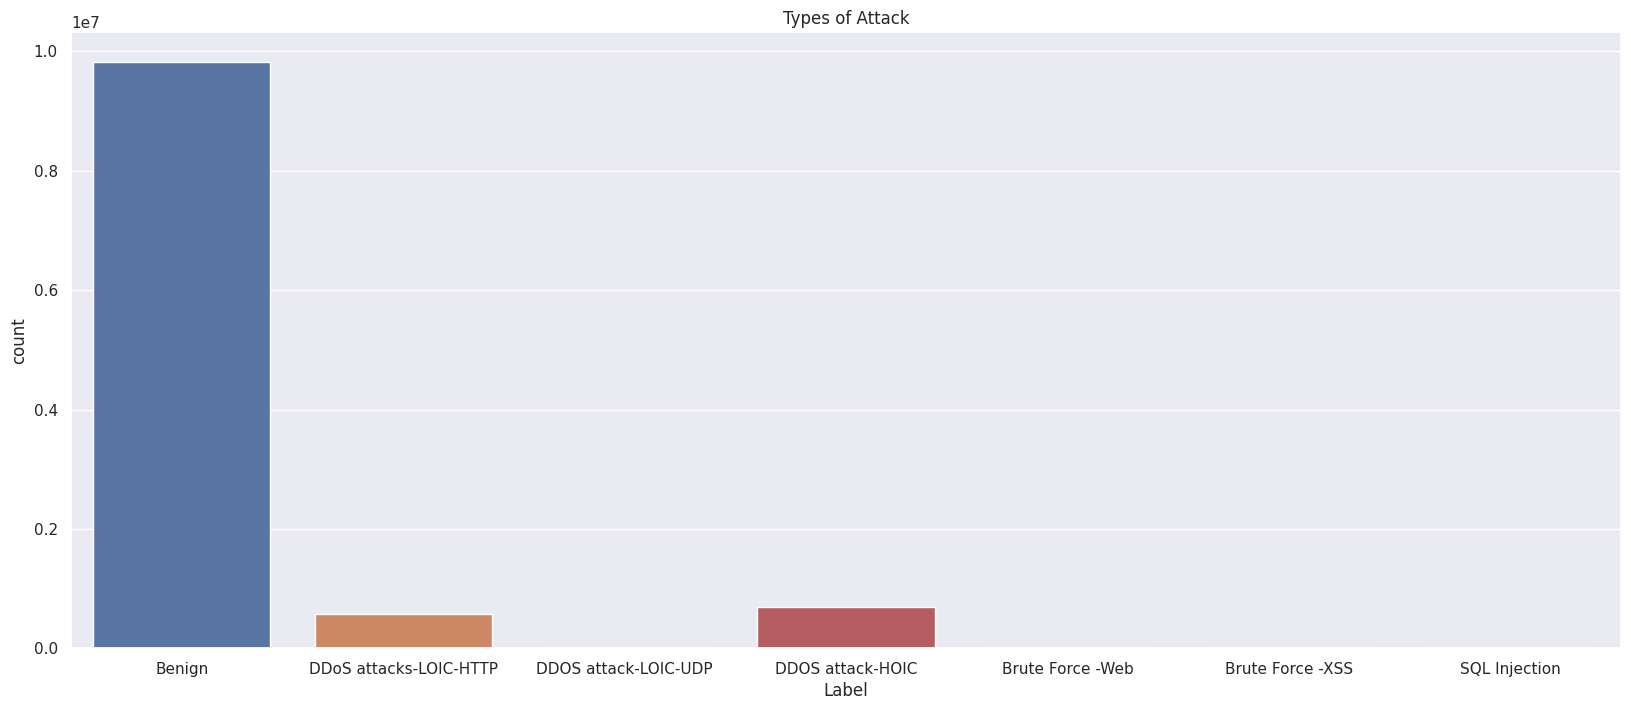

In [4]:
# Plot the Attack Type Amount
sns.set(rc={"figure.figsize":(20, 8)}) #width=20, #height=8
sns.countplot(data=network_data, x="Label").set(title='Types of Attack')
plt.show()

In [ ]:
#Plot the lesser seen attacks
sns.countplot(data=network_data[(network_data['Label'] != 'Benign') & (network_data['Label'] != 'DDOS attack-HOIC') & (network_data['Label'] != 'DDoS attacks-LOIC-HTTP')], x='Label').set(title='Types of Attack (Excluding Benign and DDos)')
plt.show()

## Top 5 Most Common Destination Ports for all Non-benign Attacks ##

In [ ]:
ports = network_data['Dst Port'][network_data['Label'] != 'Benign'].value_counts()
for i in range(0,5):
    print("Port Number:", ports.index[i], "\t# Occurences:", ports.values[i])

### Top 5 most common Destination Ports for all Brute Force -Web Attacks ###

In [5]:
ports = network_data['Dst Port'][network_data['Label'] == 'Brute Force -Web'].value_counts()
for i in range(0,5):
    print("Port Number:", ports.index[i], "\t# Occurences:", ports.values[i])

Port Number: 80 	# Occurences: 460
Port Number: 500 	# Occurences: 126
Port Number: 0 	# Occurences: 21
Port Number: 67 	# Occurences: 2
Port Number: 31808 	# Occurences: 1


### Top 3 most common Destination Ports for all Brute Force -XSS Attacks ###

In [6]:
ports = network_data['Dst Port'][network_data['Label'] == 'Brute Force -XSS'].value_counts()
for i in range(0,3):
    print("Port Number:", ports.index[i], "\t# Occurences:", ports.values[i])

Port Number: 80 	# Occurences: 225
Port Number: 500 	# Occurences: 4
Port Number: 67 	# Occurences: 1


### Most common Destination Port for all DDOS attack-HOIC ###

In [7]:
ports = network_data['Dst Port'][network_data['Label'] == 'DDOS attack-HOIC'].value_counts()
for i in range(0,1):
    print("Port Number:", ports.index[i], "\t# Occurences:", ports.values[i])

Port Number: 80 	# Occurences: 686012


### Most common Destination Port for all DDoS attacks-LOIC HTTP ###

In [8]:
ports = network_data['Dst Port'][network_data['Label'] == 'DDoS attacks-LOIC-HTTP'].value_counts()
for i in range(0,1):
    print("Port Number:", ports.index[i], "\t# Occurences:", ports.values[i])

Port Number: 80 	# Occurences: 576191


### Most common Destination Ports for all DDOS attack-LOIC UDP ###

In [9]:
ports = network_data['Dst Port'][network_data['Label'] == 'DDOS attack-LOIC-UDP'].value_counts()
for i in range(0,1):
    print("Port Number:", ports.index[i], "\t# Occurences:", ports.values[i])

Port Number: 80 	# Occurences: 1730


### Most common Destination Ports for SQL Injection Attacks ###

In [10]:
ports = network_data['Dst Port'][network_data['Label'] == 'SQL Injection'].value_counts()
for i in range(0,1):
    print("Port Number:", ports.index[i], "\t# Occurences:", ports.values[i])

Port Number: 80 	# Occurences: 87


## Top 5 Most Common Source Ports for all Non-benign Attacks ##

In [11]:
ports = network_data['Src Port'][network_data['Label'] != 'Benign'].value_counts()
for i in range(0,5):
    print("Port Number:", ports.index[i], "\t# Occurences:", ports.values[i])

Port Number: 0.0 	# Occurences: 688670
Port Number: 57391.0 	# Occurences: 48
Port Number: 57387.0 	# Occurences: 48
Port Number: 57386.0 	# Occurences: 48
Port Number: 56549.0 	# Occurences: 48


## Packet Analysis

Knowing the distribution of packet lengths, packet count, and the average rate of packets per second can help detect malicious network traffic such as DDoS attack

#### Packet Lengths

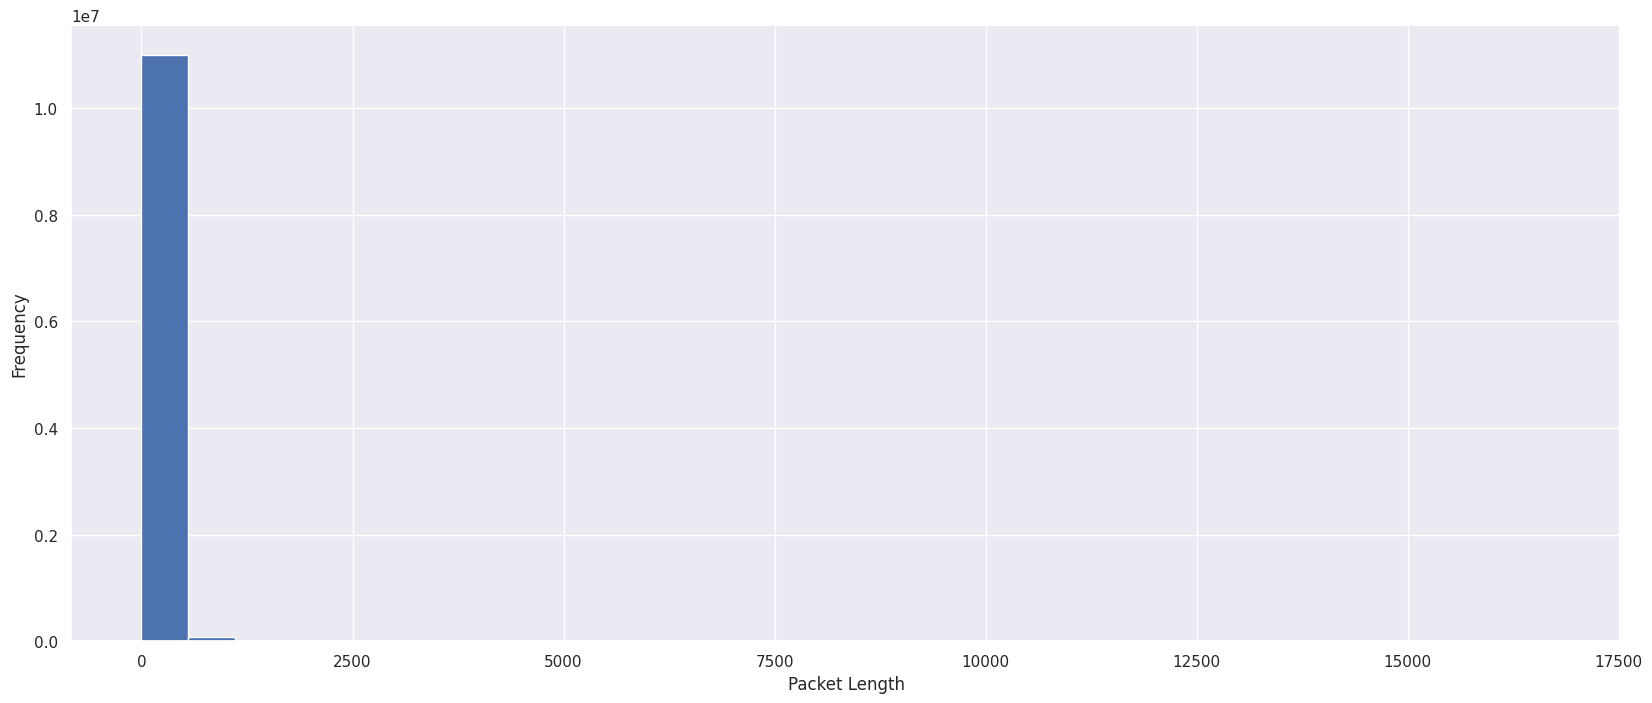

In [12]:
# Create a histogram of the packet lengths
network_data["Pkt Len Mean"].hist(bins=30)

# Set the x-axis label
plt.xlabel("Packet Length")

# Set the y-axis label
plt.ylabel("Frequency")

# Display the histogram
plt.show()

In [13]:
#Numerical Value : 
# Find the average 
avg_A = network_data['Pkt Len Mean'].mean()
print("Average of Packet Length:", avg_A)

# Find the range
range_B = network_data['Pkt Len Mean'].describe()['max'] - network_data['Pkt Len Mean'].describe()['min']
print("Range of Packet Length", range_B)

Average of Packet Length: 80.34269584760987
Range of Packet Length 16691.333333333332


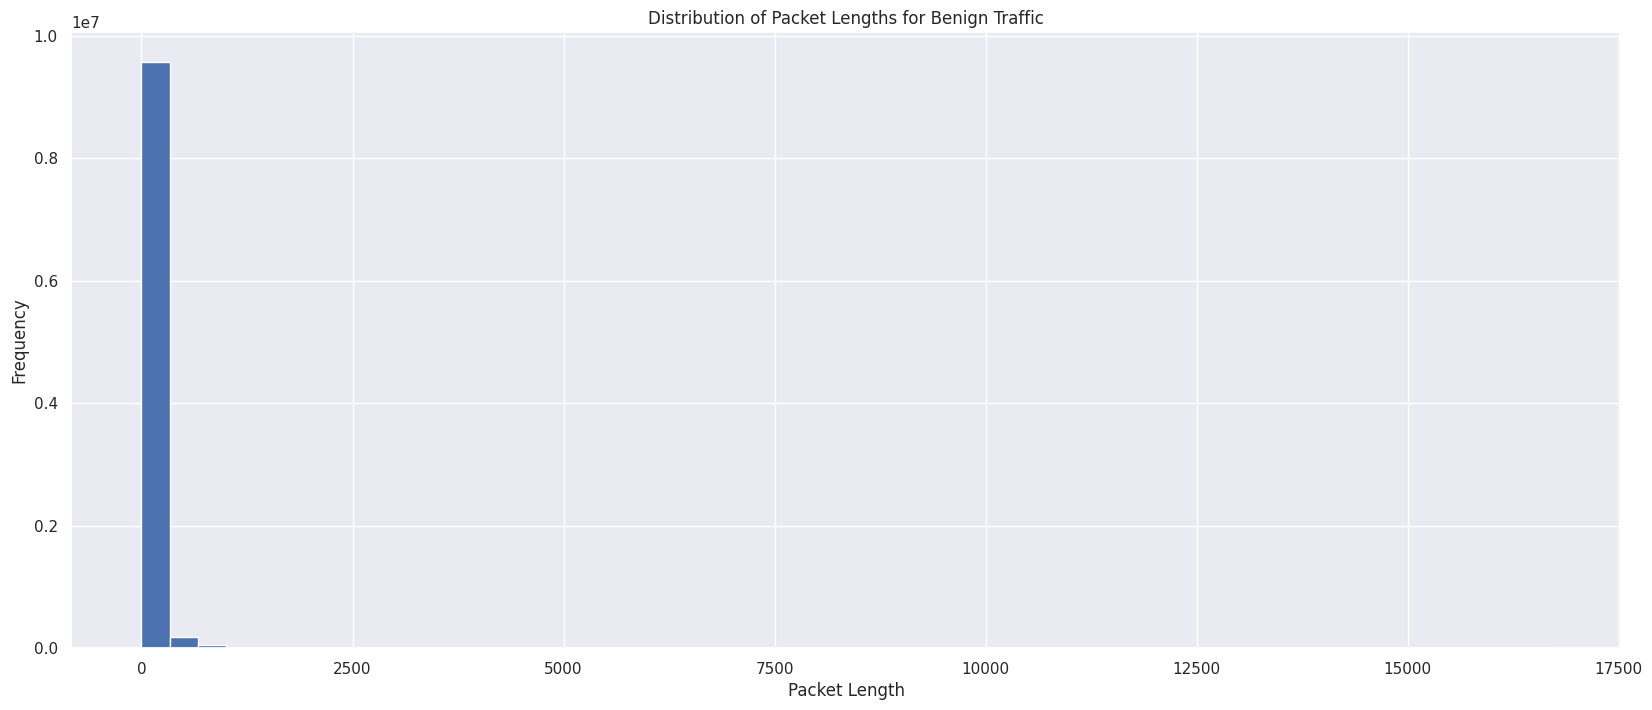

In [14]:
# Filter out only the benign traffic
df_benign = network_data[network_data["Label"] == "Benign"]

# Plot the distribution of packet lengths for benign traffic only
plt.hist(df_benign["Pkt Len Mean"], bins=50)
plt.title("Distribution of Packet Lengths for Benign Traffic")
plt.xlabel("Packet Length")
plt.ylabel("Frequency")
plt.show()

In [15]:
#Numerical Value :
# Find the average 
avg_A = df_benign['Pkt Len Mean'].mean()
print("Average of Packet Length:", avg_A)

# Find the range
range_B = df_benign['Pkt Len Mean'].describe()['max'] - df_benign['Pkt Len Mean'].describe()['min']
print("Range of Packet Length", range_B)

Average of Packet Length: 84.45769037378359
Range of Packet Length 16691.333333333332


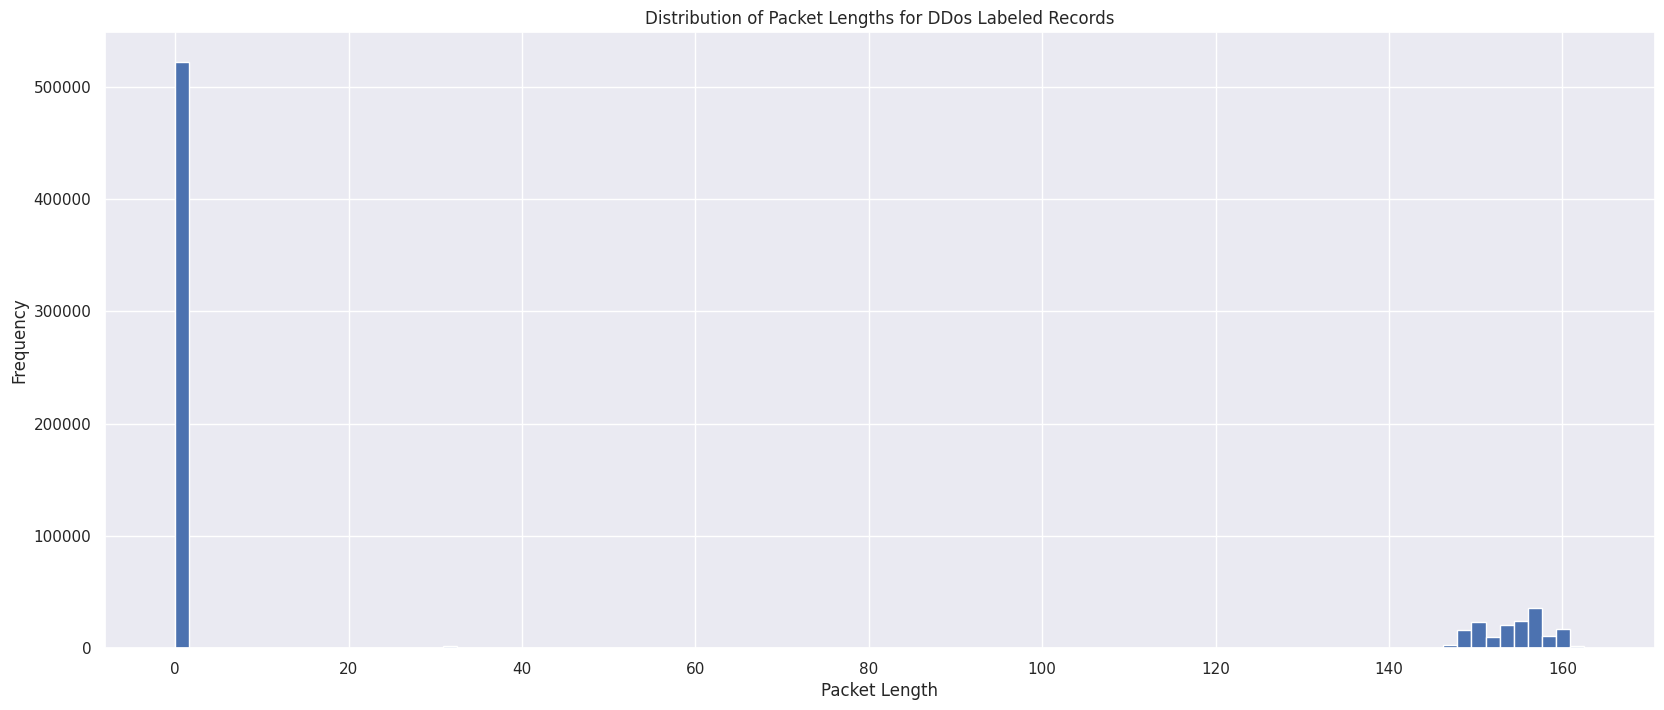

In [16]:
# filter the dataframe to include only records with labels containing the word "DDos"
df_ddos = network_data[network_data['Label'].str.contains('DDOS')]

# create a histogram of packet lengths for the filtered dataframe
plt.hist(df_ddos['Pkt Len Mean'], bins=100)
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Packet Lengths for DDos Labeled Records')
plt.show()

In [17]:
#Numerical Values : 
# Find the average 
avg_A = df_ddos['Pkt Len Mean'].mean()
print("Average of Packet Length:", avg_A)

# Find the range
range_B = df_ddos['Pkt Len Mean'].describe()['max'] - df_ddos['Pkt Len Mean'].describe()['min']
print("Range of Packet Length", range_B)

Average of Packet Length: 36.810690818650016
Range of Packet Length 162.5


#### Packet Counts

In [18]:
#Numerical Value :
# Find the average 
avg_A = df_benign['Tot Fwd Pkts'].mean()
print("Average of Total Fwd Packet:", avg_A)

# Find the average 
avg_A = df_benign['Tot Bwd Pkts'].mean()
print("Average of Total Bwd Packet:", avg_A)

Average of Total Fwd Packet: 6.129636347802945
Average of Total Bwd Packet: 7.31775720140327


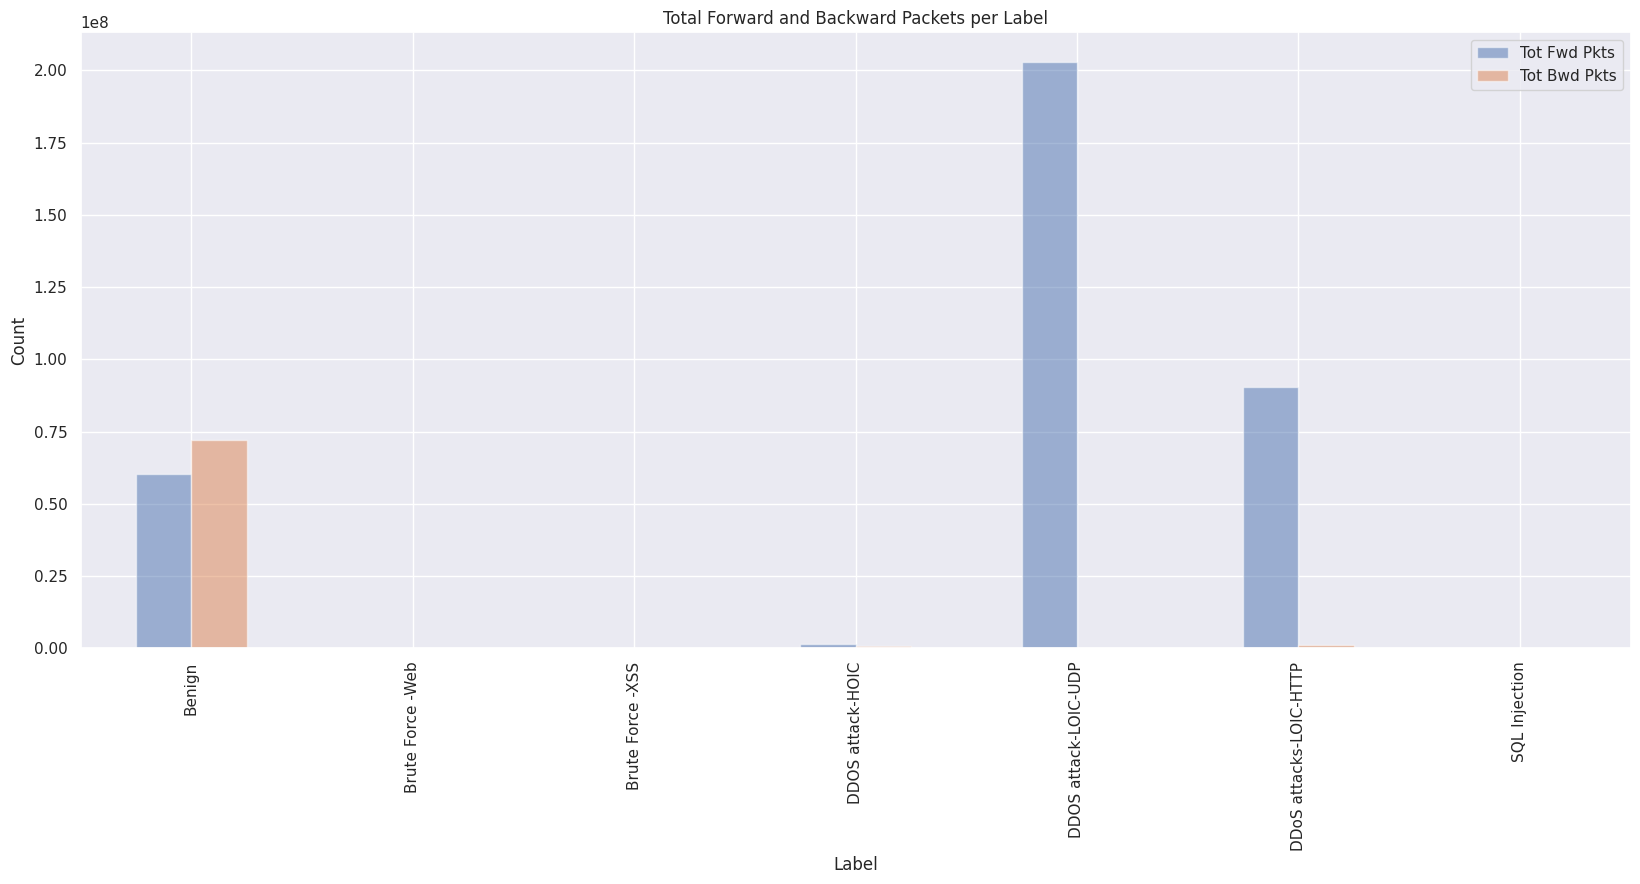

In [19]:
# Group by label and calculate the sum of total forward and backward packets
grouped = network_data.groupby(by='Label')[['Tot Fwd Pkts', 'Tot Bwd Pkts']].sum()

# Plot the histograms
grouped.plot(kind='bar', alpha=0.5, legend=True)

# Set the labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Total Forward and Backward Packets per Label')

# Show the plot
plt.show()

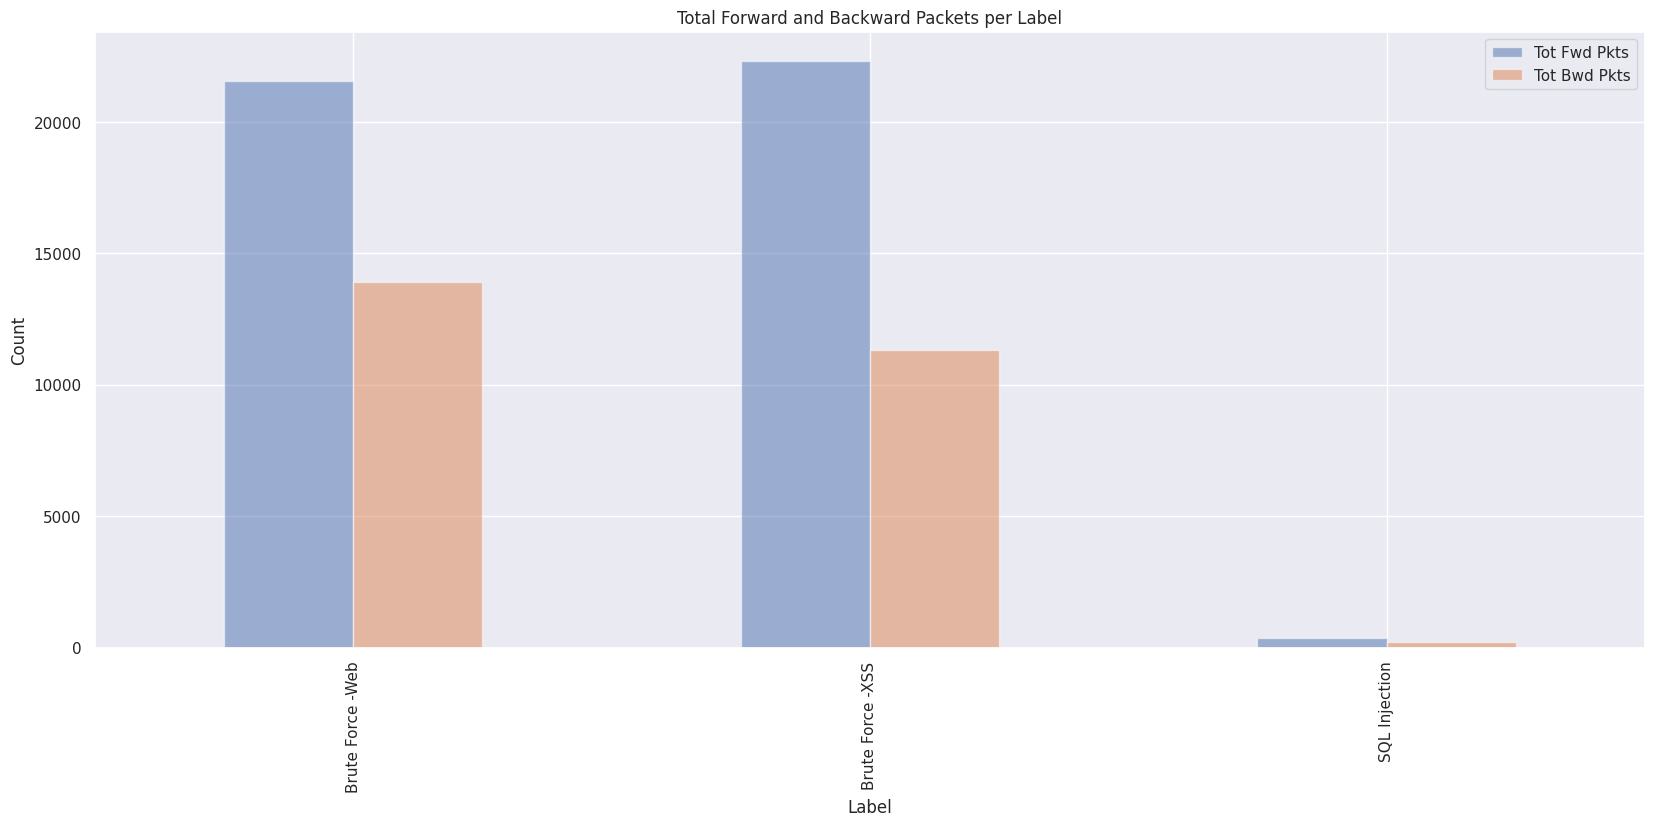

In [20]:
# Group by label and calculate the sum of total forward and backward packets
grouped = network_data[(~network_data['Label'].str.contains('DDOS', case=False)) & (network_data['Label'] != 'Benign')].groupby('Label')[['Tot Fwd Pkts', 'Tot Bwd Pkts']].sum()

# Plot the histograms
grouped.plot(kind='bar', alpha=0.5, legend=True)

# Set the labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Total Forward and Backward Packets per Label')

# Show the plot
plt.show()

In [21]:
# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'Tot Fwd Pkts'].mean()
avg_benign_bwd = network_data.loc[network_data['Label'] == 'Benign', 'Tot Bwd Pkts'].mean()

# Calculate the average of column 'Value' for rows where 'Class' does not equal 'benign'
avg_non_benign = network_data.loc[network_data['Label'] != 'Benign', 'Tot Fwd Pkts'].mean()
avg_non_benign_bwd = network_data.loc[network_data['Label'] != 'Benign', 'Tot Bwd Pkts'].mean()

# Print the results
print("Average of 'Tot Fwd Pkts' where 'Label' equals 'benign':", avg_benign)
print("Average of 'Tot Fwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign)
print("Average of 'Tot Bwd Pkts' where 'Label' equals 'benign':", avg_benign_bwd)
print("Average of 'Tot Bwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign_bwd)

Average of 'Tot Fwd Pkts' where 'Label' equals 'benign': 6.129636347802945
Average of 'Tot Fwd Pkts' where 'Label' does not equal 'benign': 233.2968508002065
Average of 'Tot Bwd Pkts' where 'Label' equals 'benign': 7.31775720140327
Average of 'Tot Bwd Pkts' where 'Label' does not equal 'benign': 1.4528007425321834


#### Average Rate

/tmp/ipykernel_3253/3337812580.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rate = network_data.groupby("Label").mean()["Fwd Pkts/s"]


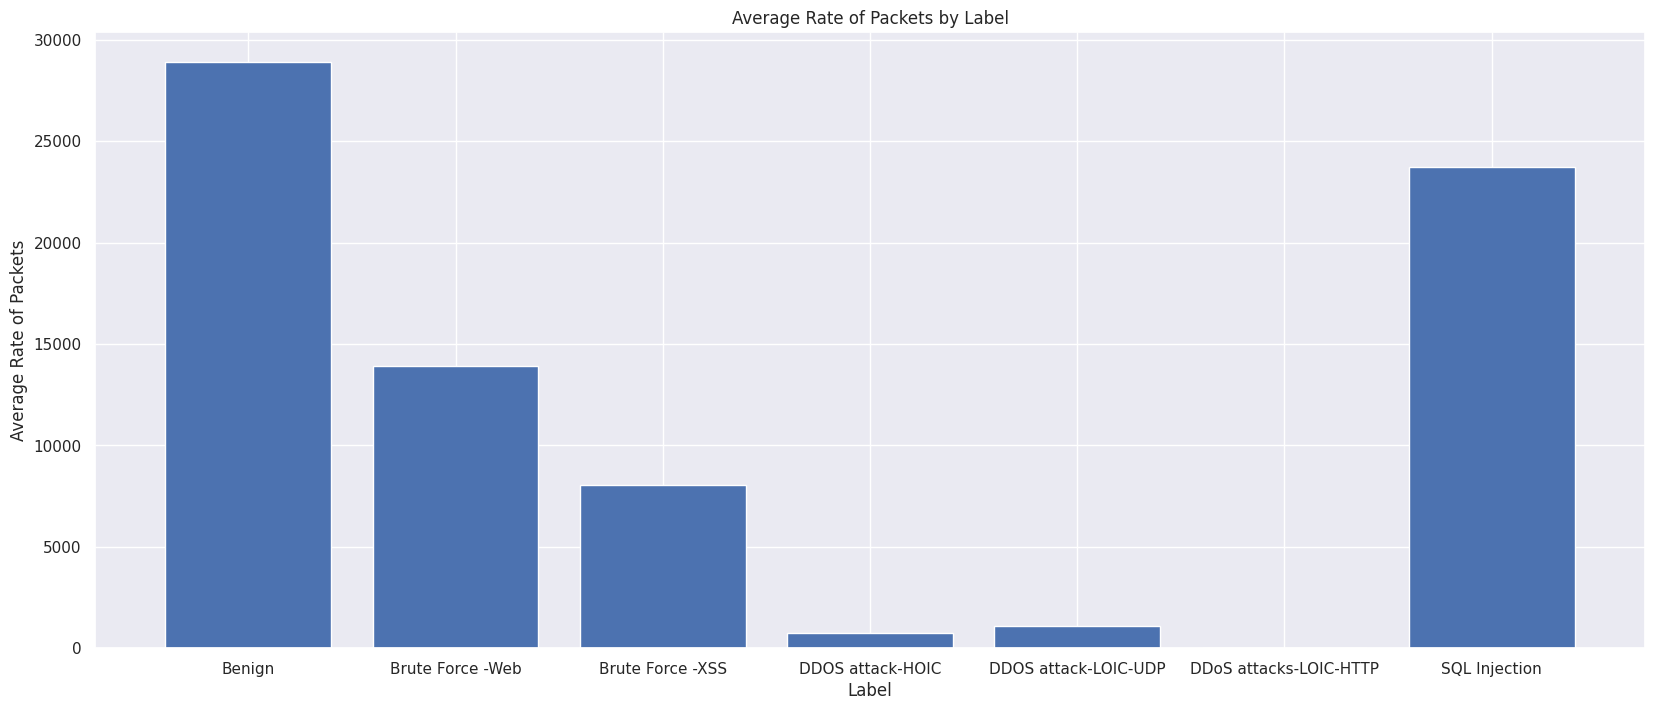

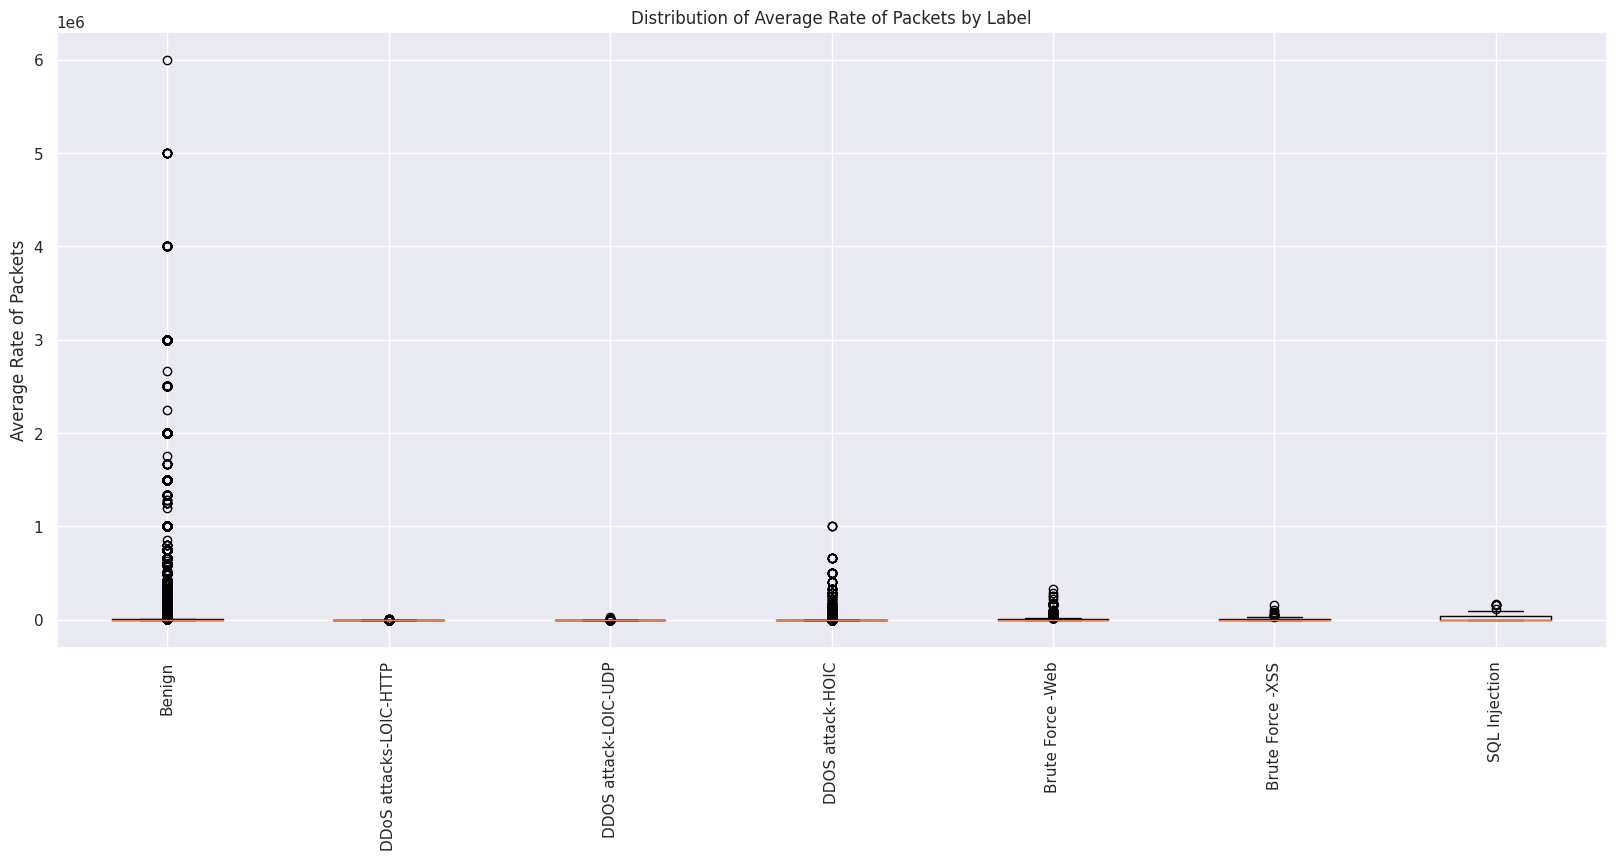

In [22]:
# Calculate the average rate of packets for each label
avg_rate = network_data.groupby("Label").mean()["Fwd Pkts/s"]

# Create a bar chart to visualize the average rate of packets for each label
plt.bar(avg_rate.index, avg_rate)
plt.title("Average Rate of Packets by Label")
plt.xlabel("Label")
plt.ylabel("Average Rate of Packets")
plt.show()

# Create a box plot to visualize the distribution of average rate of packets for each label
plt.boxplot([network_data[network_data["Label"] == label]["Fwd Pkts/s"] for label in network_data["Label"].unique()])
plt.title("Distribution of Average Rate of Packets by Label")
plt.xticks(range(1, len(network_data["Label"].unique()) + 1), network_data["Label"].unique(), rotation=90)
plt.ylabel("Average Rate of Packets")
plt.show()

In [23]:
#Numerical Value : 
# Find the average 
avg_A = network_data['Fwd Pkts/s'].mean()
print("Average of Forward Packet per Second Overall:", avg_A)

# Find the average 
avg_A = network_data['Bwd Pkts/s'].mean()
print("Average of Backword Packet per Second Overall:", avg_A)
print()

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'Fwd Pkts/s'].mean()
avg_benign_bwd = network_data.loc[network_data['Label'] == 'Benign', 'Bwd Pkts/s'].mean()

# Calculate the average of column 'Value' for rows where 'Class' does not equal 'benign'
avg_non_benign = network_data.loc[network_data['Label'] != 'Benign', 'Fwd Pkts/s'].mean()
avg_non_benign_bwd = network_data.loc[network_data['Label'] != 'Benign', 'Bwd Pkts/s'].mean()

# Print the results
print("Average of 'Tot Fwd Pkts' where 'Label' equals 'benign':", avg_benign)
print("Average of 'Tot Fwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign)
print("Average of 'Tot Bwd Pkts' where 'Label' equals 'benign':", avg_benign_bwd)
print("Average of 'Tot Bwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign_bwd)

Average of Forward Packet per Second Overall: 25681.354254795588
Average of Backword Packet per Second Overall: 2961.269901352562

Average of 'Tot Fwd Pkts' where 'Label' equals 'benign': 28932.079991057613
Average of 'Tot Fwd Pkts' where 'Label' does not equal 'benign': 418.9952241431322
Average of 'Tot Bwd Pkts' where 'Label' equals 'benign': 3328.2848984143307
Average of 'Tot Bwd Pkts' where 'Label' does not equal 'benign': 109.08691895504667


## Timestamp Analysis ##
Information about what time of day malicious attacks took place. It is woth nothing the dataset does not distinguish between am and pm

### Benign ###
We found no significant patter for any benign events that occured.

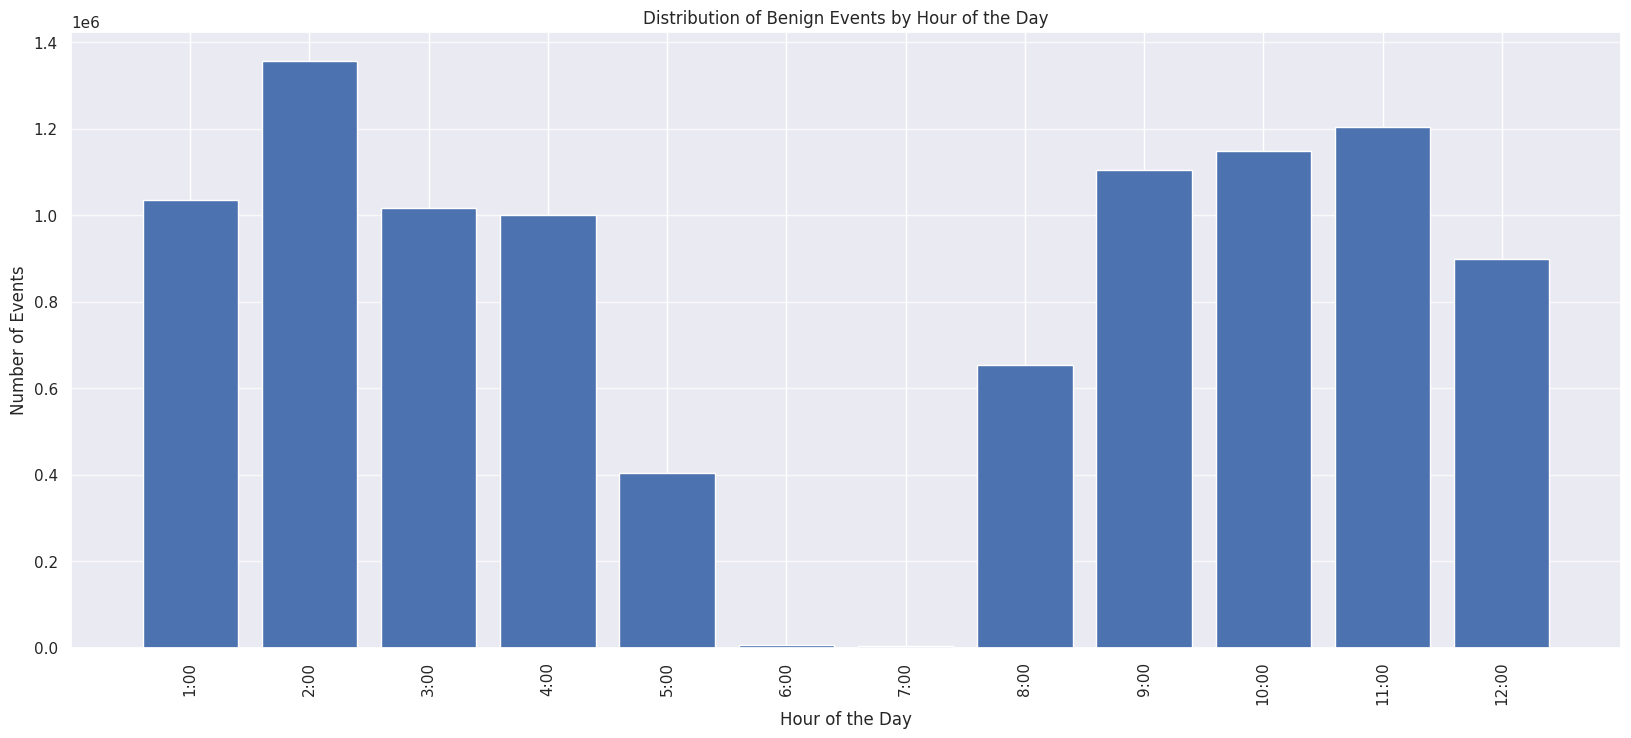

In [24]:
# Filter for benign data and group by hour of the day
benign_data = network_data.loc[network_data['Label'] == 'Benign']['Timestamp']
benign_data = benign_data.groupby(benign_data.dt.hour).count()

# create a bar chart of the data
plt.bar(benign_data.index, benign_data)

# Format the chart
plt.title("Distribution of Benign Events by Hour of the Day")
plt.xlabel("Hour of the Day")
# set the xticks to be the hours of the day formatted HH:00 for 0 to 12
plt.xticks(range(1, 13), [f"{hour}:00" for hour in range(1, 13)], rotation=90)
plt.xlim(0, 13)
plt.ylabel("Number of Events")
plt.grid(axis='y', alpha=0.75)

plt.show()

### Non-Benign ###
We found that most of the non-benign incidents occured around 2:00 a.m. and around 10:00 a.m. We then further broke down the timestamps at which attacks occured.

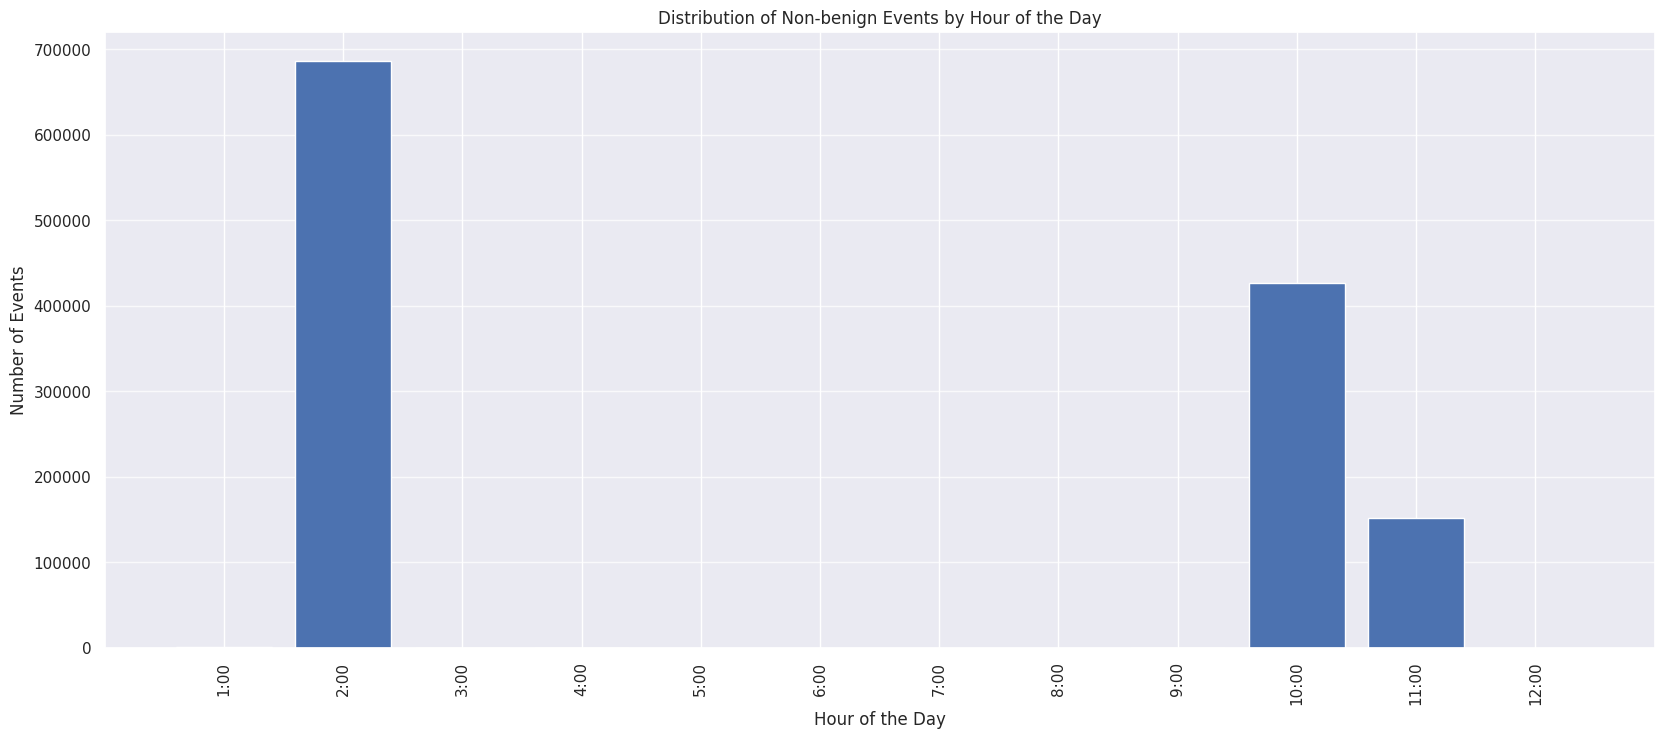

In [25]:
# Filter for benign data and group by hour of the day
nonbenign_data = network_data.loc[network_data['Label'] != 'Benign']['Timestamp']
nonbenign_data = nonbenign_data.groupby(nonbenign_data.dt.hour).count()

# create a bar chart of the data
plt.bar(nonbenign_data.index, nonbenign_data)

# Format the chart
plt.title("Distribution of Non-benign Events by Hour of the Day")
plt.xlabel("Hour of the Day")
# set the xticks to be the hours of the day formatted HH:00
plt.xticks(range(1, 13), [f"{hour}:00" for hour in range(1, 13)], rotation=90)
plt.xlim(0, 13)
plt.ylabel("Number of Events")
plt.grid(axis='y', alpha=0.75)

plt.show()

#### Brute Force -Web ####

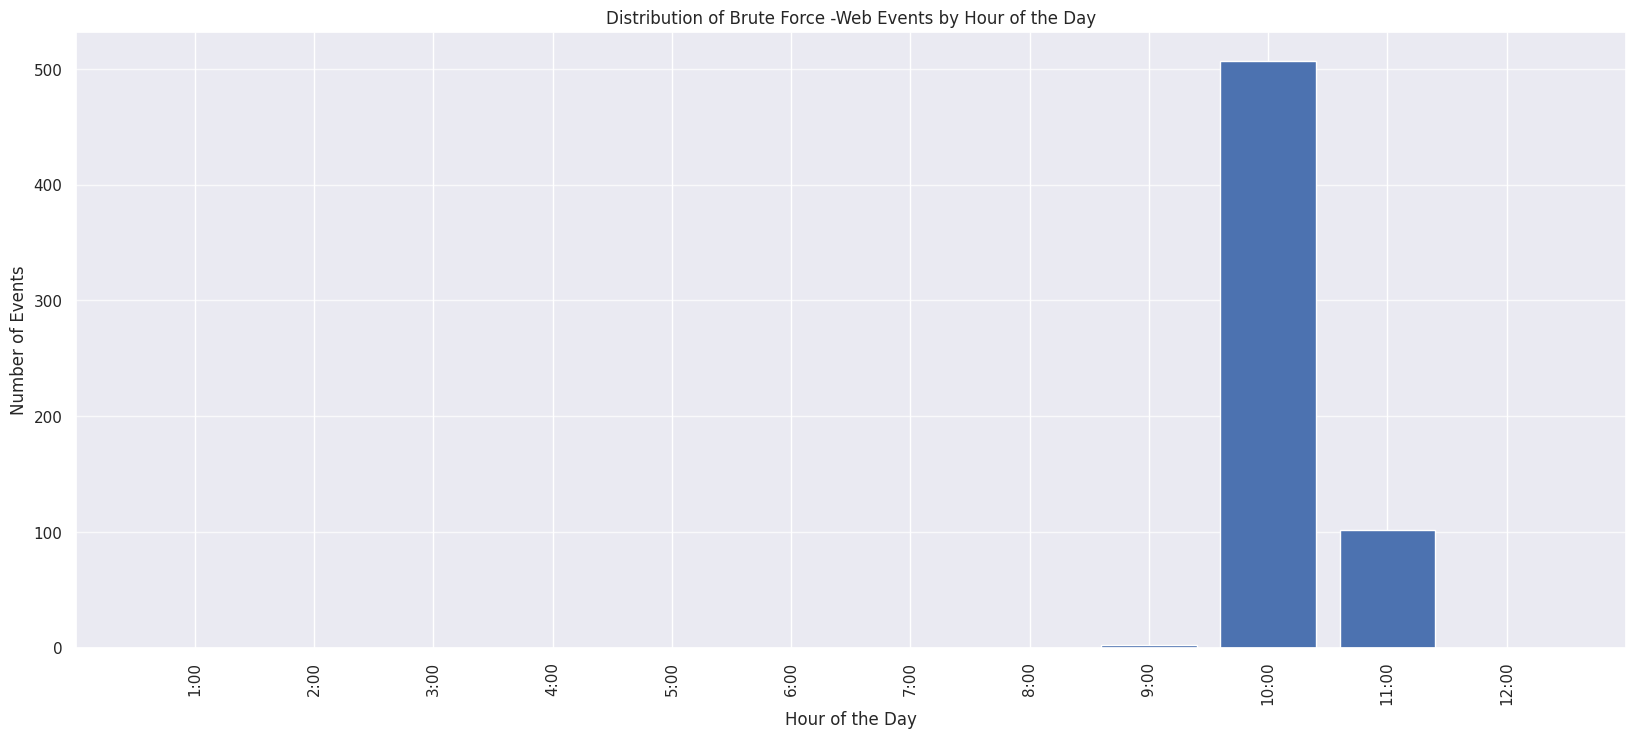

In [26]:
# Filter for benign data and group by hour of the day
BFW_data = network_data.loc[network_data['Label'] == 'Brute Force -Web']['Timestamp']
BFW_data = BFW_data.groupby(BFW_data.dt.hour).count()

# create a bar chart of the data
plt.bar(BFW_data.index, BFW_data)

# Format the chart
plt.title("Distribution of Brute Force -Web Events by Hour of the Day")
plt.xlabel("Hour of the Day")
# set the xticks to be the hours of the day formatted HH:00
plt.xticks(range(1, 13), [f"{hour}:00" for hour in range(1, 13)], rotation=90)
plt.xlim(0, 13)
plt.ylabel("Number of Events")
plt.grid(axis='y', alpha=0.75)

plt.show()

#### Brute Force -XSS ####

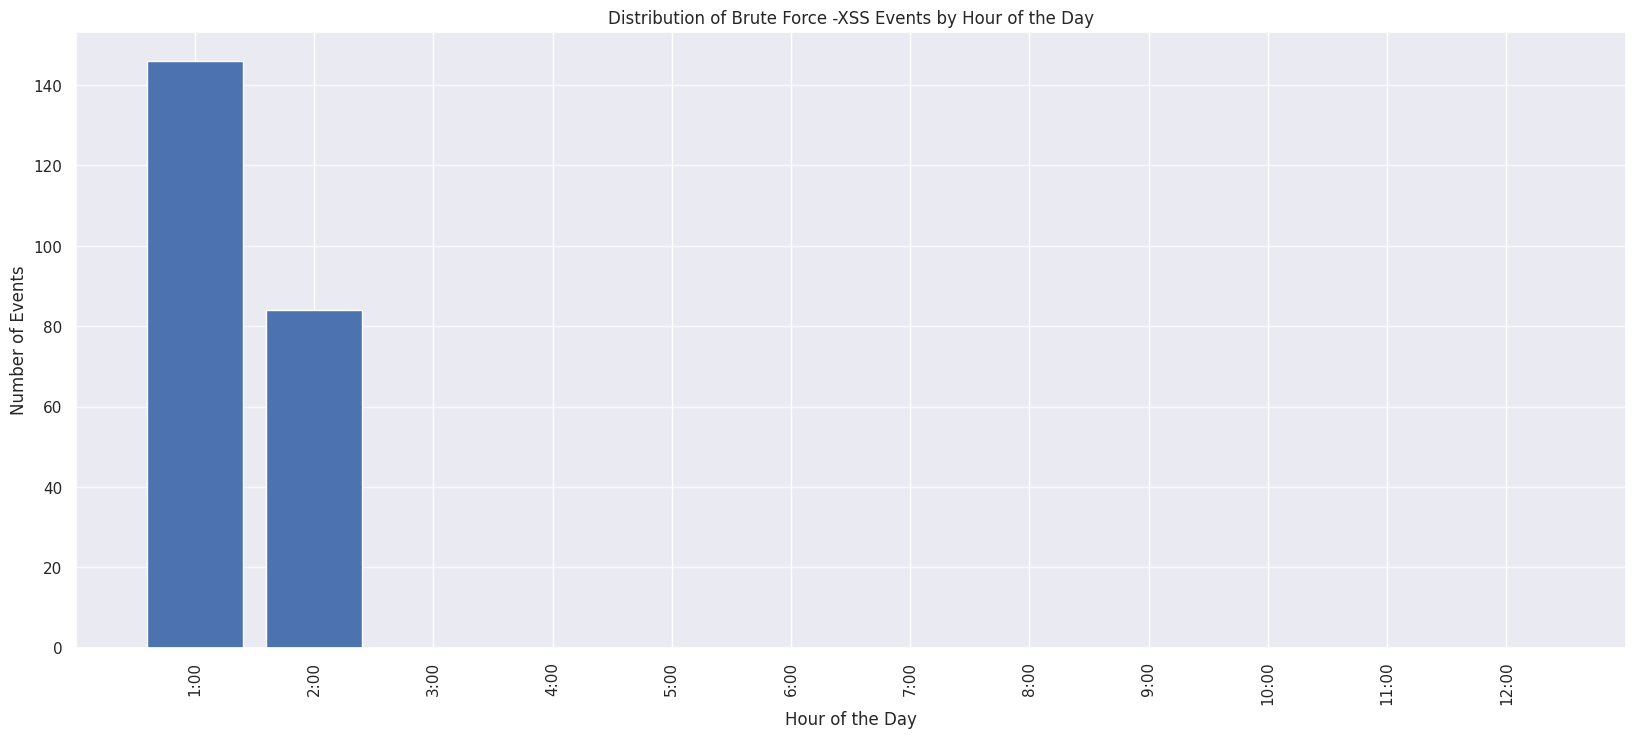

In [27]:
# Filter for benign data and group by hour of the day
BFX_data = network_data.loc[network_data['Label'] == 'Brute Force -XSS']['Timestamp']
BFX_data = BFX_data.groupby(BFX_data.dt.hour).count()

# create a bar chart of the data
plt.bar(BFX_data.index, BFX_data)

# Format the chart
plt.title("Distribution of Brute Force -XSS Events by Hour of the Day")
plt.xlabel("Hour of the Day")
# set the xticks to be the hours of the day formatted HH:00 for 0 to 12
plt.xticks(range(1, 13), [f"{hour}:00" for hour in range(1, 13)], rotation=90)
plt.xlim(0, 13)
plt.ylabel("Number of Events")
plt.grid(axis='y', alpha=0.75)

plt.show()

#### DDOS attack-HOIC ####

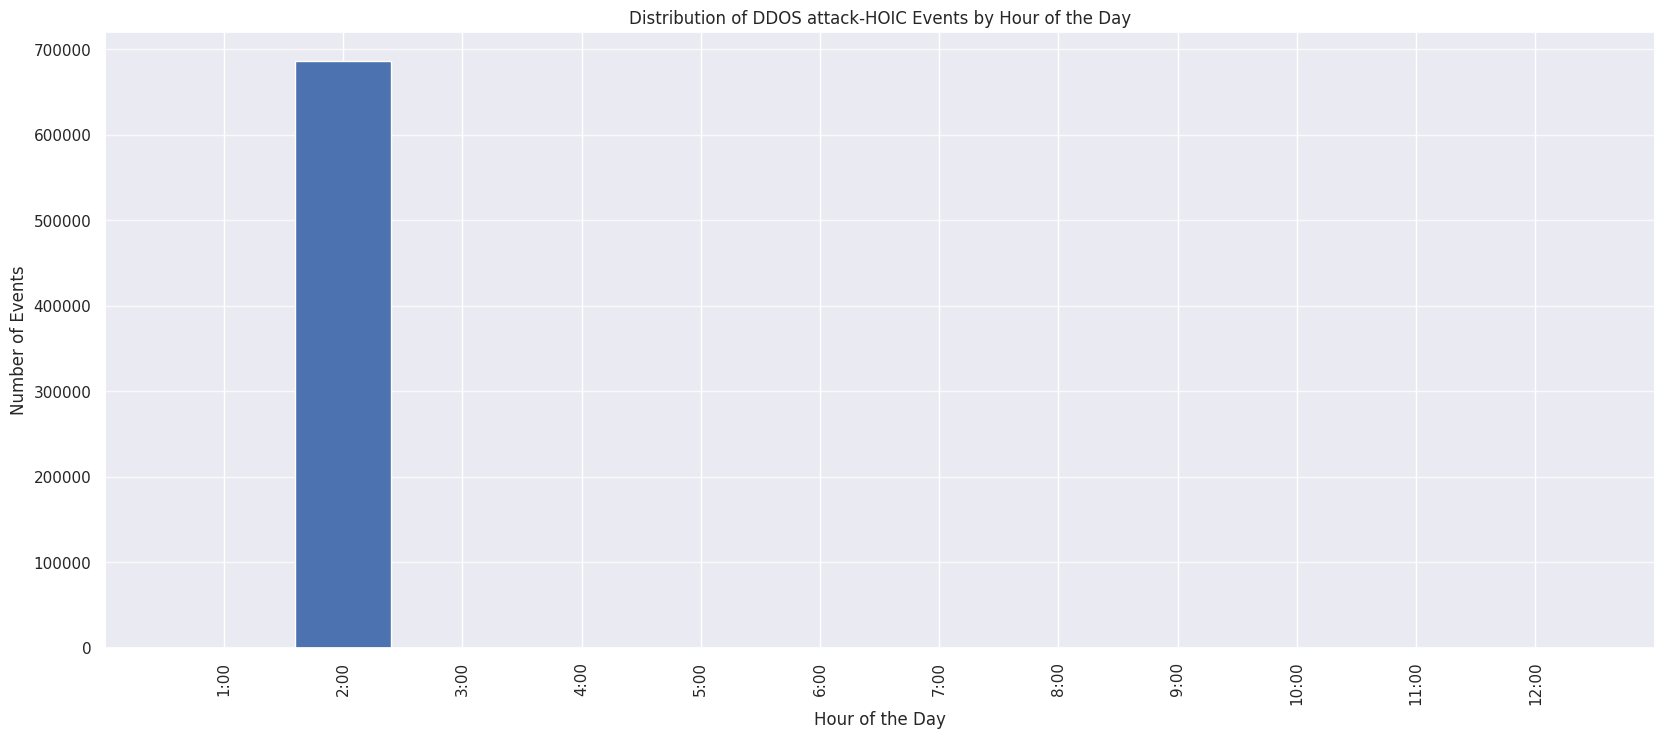

In [28]:
# Filter for benign data and group by hour of the day
DDOSH_data = network_data.loc[network_data['Label'] == 'DDOS attack-HOIC']['Timestamp']
DDOSH_data = DDOSH_data.groupby(DDOSH_data.dt.hour).count()

# create a bar chart of the data
plt.bar(DDOSH_data.index, DDOSH_data)

# Format the chart
plt.title("Distribution of DDOS attack-HOIC Events by Hour of the Day")
plt.xlabel("Hour of the Day")
# set the xticks to be the hours of the day formatted HH:00 for 0 to 12
plt.xticks(range(1, 13), [f"{hour}:00" for hour in range(1, 13)], rotation=90)
plt.xlim(0, 13)
plt.ylabel("Number of Events")
plt.grid(axis='y', alpha=0.75)

plt.show()

#### DDOS attack-LOIC-UDP ####

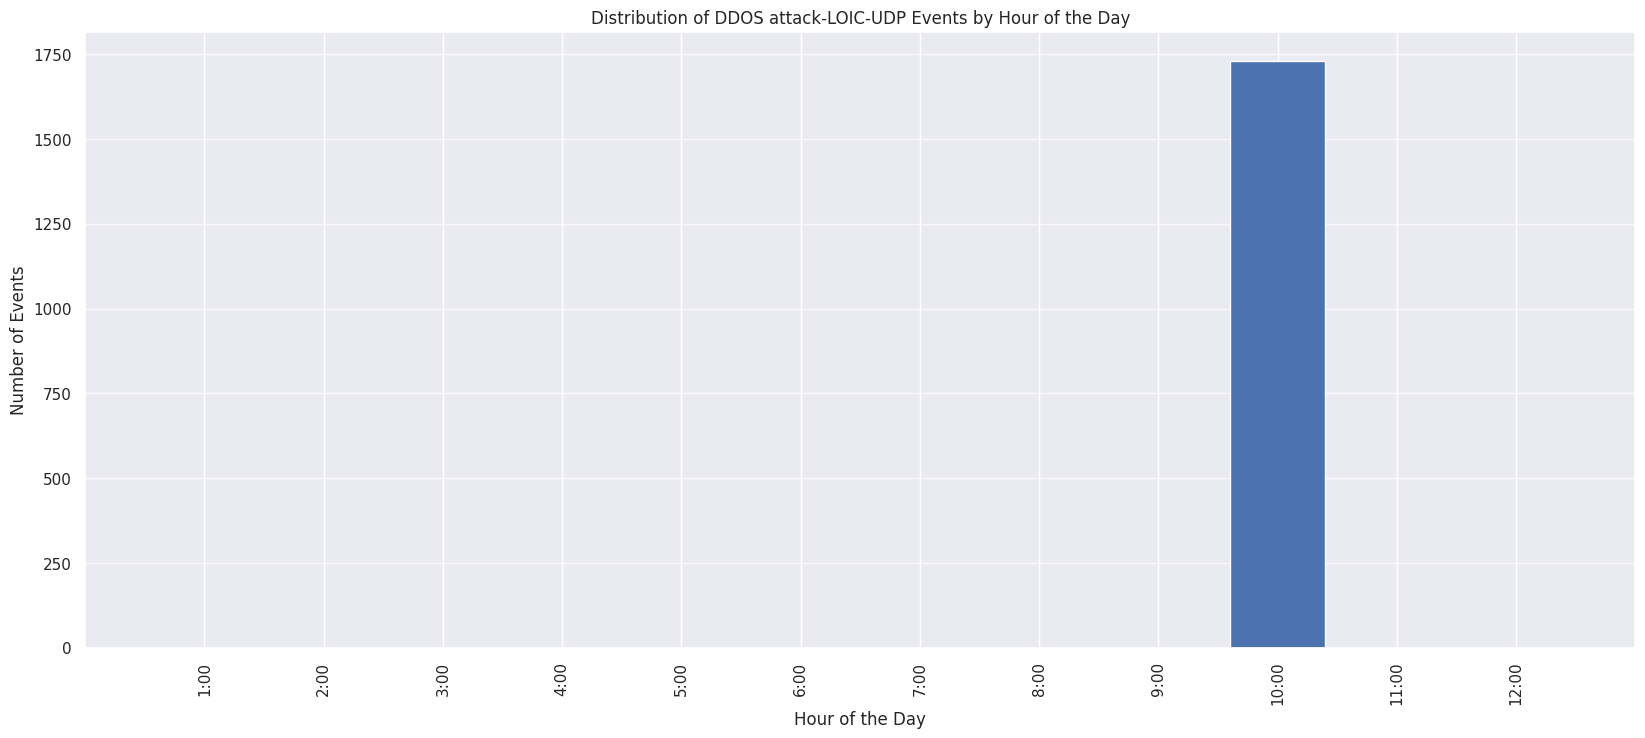

In [29]:
# Filter for benign data and group by hour of the day
DDOSLU_data = network_data.loc[network_data['Label'] == 'DDOS attack-LOIC-UDP']['Timestamp']
DDOSLU_data = DDOSLU_data.groupby(DDOSLU_data.dt.hour).count()

# create a bar chart of the data
plt.bar(DDOSLU_data.index, DDOSLU_data)

# Format the chart
plt.title("Distribution of DDOS attack-LOIC-UDP Events by Hour of the Day")
plt.xlabel("Hour of the Day")
# set the xticks to be the hours of the day formatted HH:00 for 0 to 12
plt.xticks(range(1, 13), [f"{hour}:00" for hour in range(1, 13)], rotation=90)
plt.xlim(0, 13)
plt.ylabel("Number of Events")
plt.grid(axis='y', alpha=0.75)

plt.show()

#### DDOS attack-LOIC-HTTP ####

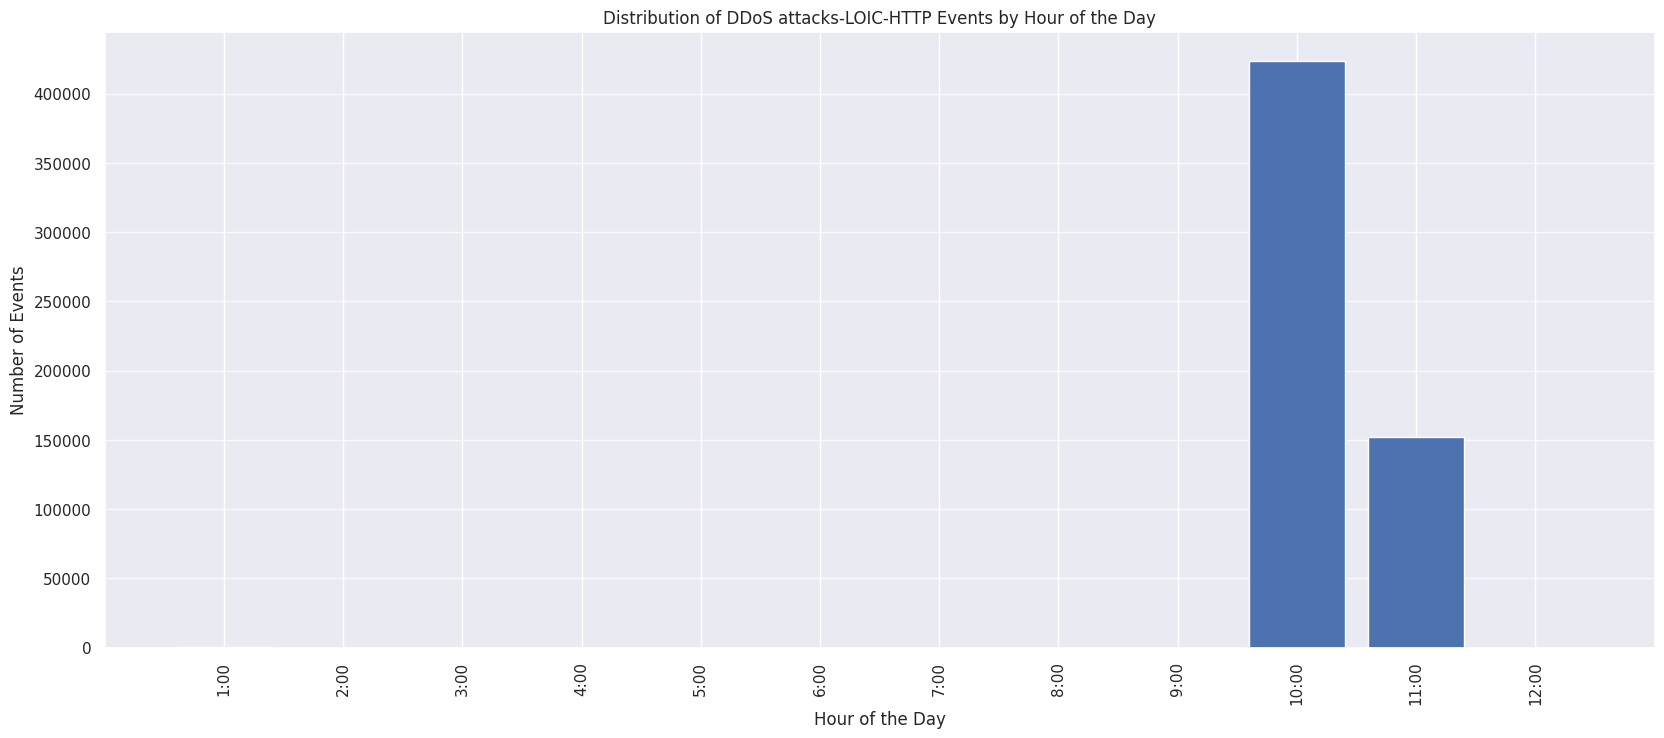

In [30]:
# Filter for benign data and group by hour of the day
DDOSLH_data = network_data.loc[network_data['Label'] == 'DDoS attacks-LOIC-HTTP']['Timestamp']
DDOSLH_data = DDOSLH_data.groupby(DDOSLH_data.dt.hour).count()

# create a bar chart of the data
plt.bar(DDOSLH_data.index, DDOSLH_data)

# Format the chart
plt.title("Distribution of DDoS attacks-LOIC-HTTP Events by Hour of the Day")
plt.xlabel("Hour of the Day")
# set the xticks to be the hours of the day formatted HH:00 for 0 to 12
plt.xticks(range(1, 13), [f"{hour}:00" for hour in range(1, 13)], rotation=90)
plt.xlim(0, 13)
plt.ylabel("Number of Events")
plt.grid(axis='y', alpha=0.75)

plt.show()

#### SQL Injection ####

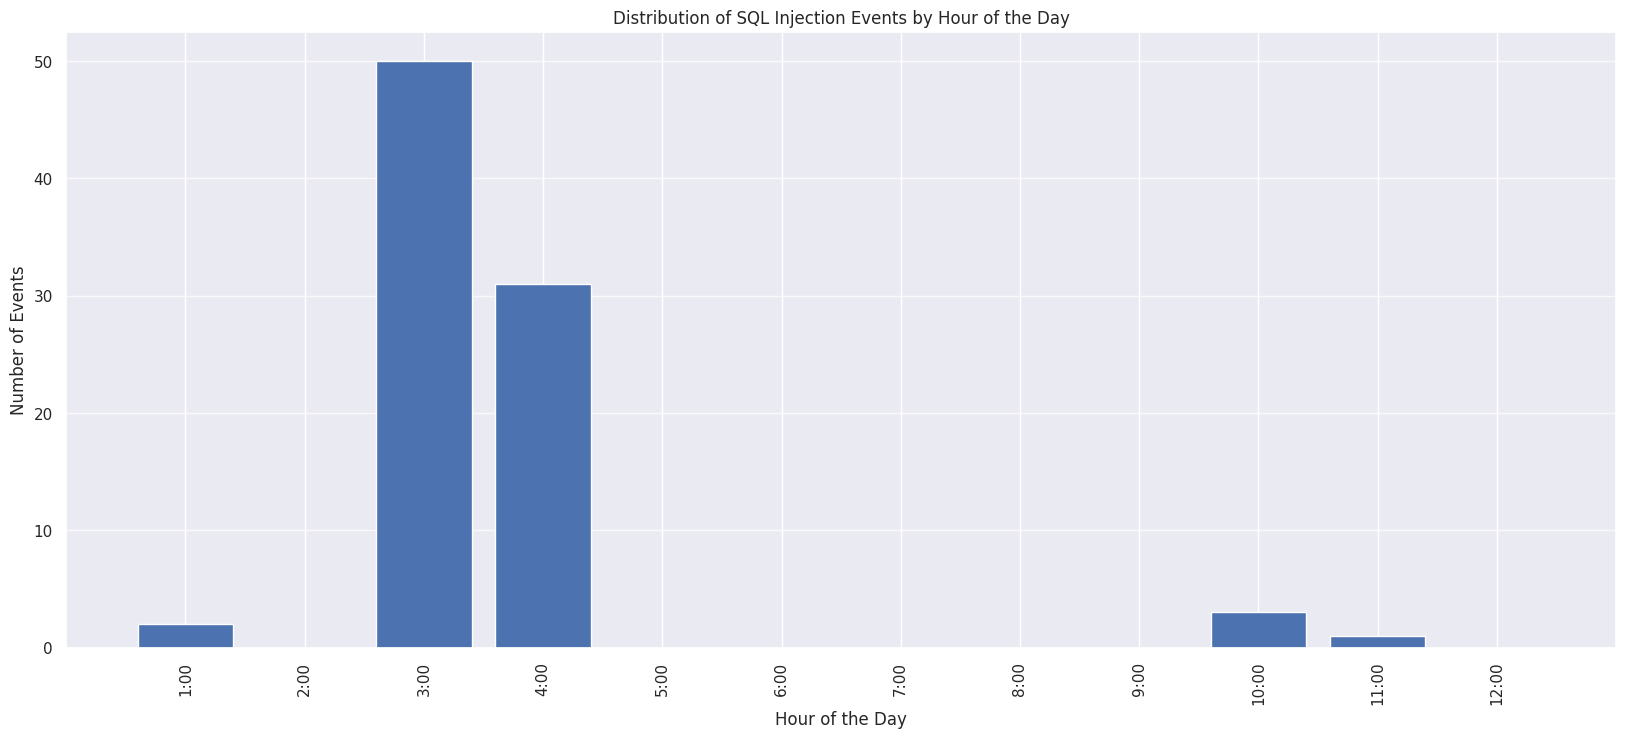

In [31]:
# Filter for benign data and group by hour of the day
SQL_data = network_data.loc[network_data['Label'] == 'SQL Injection']['Timestamp']
SQL_data = SQL_data.groupby(SQL_data.dt.hour).count()

# create a bar chart of the data
plt.bar(SQL_data.index, SQL_data)

# Format the chart
plt.title("Distribution of SQL Injection Events by Hour of the Day")
plt.xlabel("Hour of the Day")
# set the xticks to be the hours of the day formatted HH:00 for 0 to 12
plt.xticks(range(1, 13), [f"{hour}:00" for hour in range(1, 13)], rotation=90)
plt.xlim(0, 13)
plt.ylabel("Number of Events")
plt.grid(axis='y', alpha=0.75)

plt.show()

## Flag Analysis

Information about flag counts, such as FIN, SYN, RST, PSH, ACK, URG, and ECE can help identify specific types of attacks, such as TCP SYN flooding,

<AxesSubplot: xlabel='Label', ylabel='Count'>

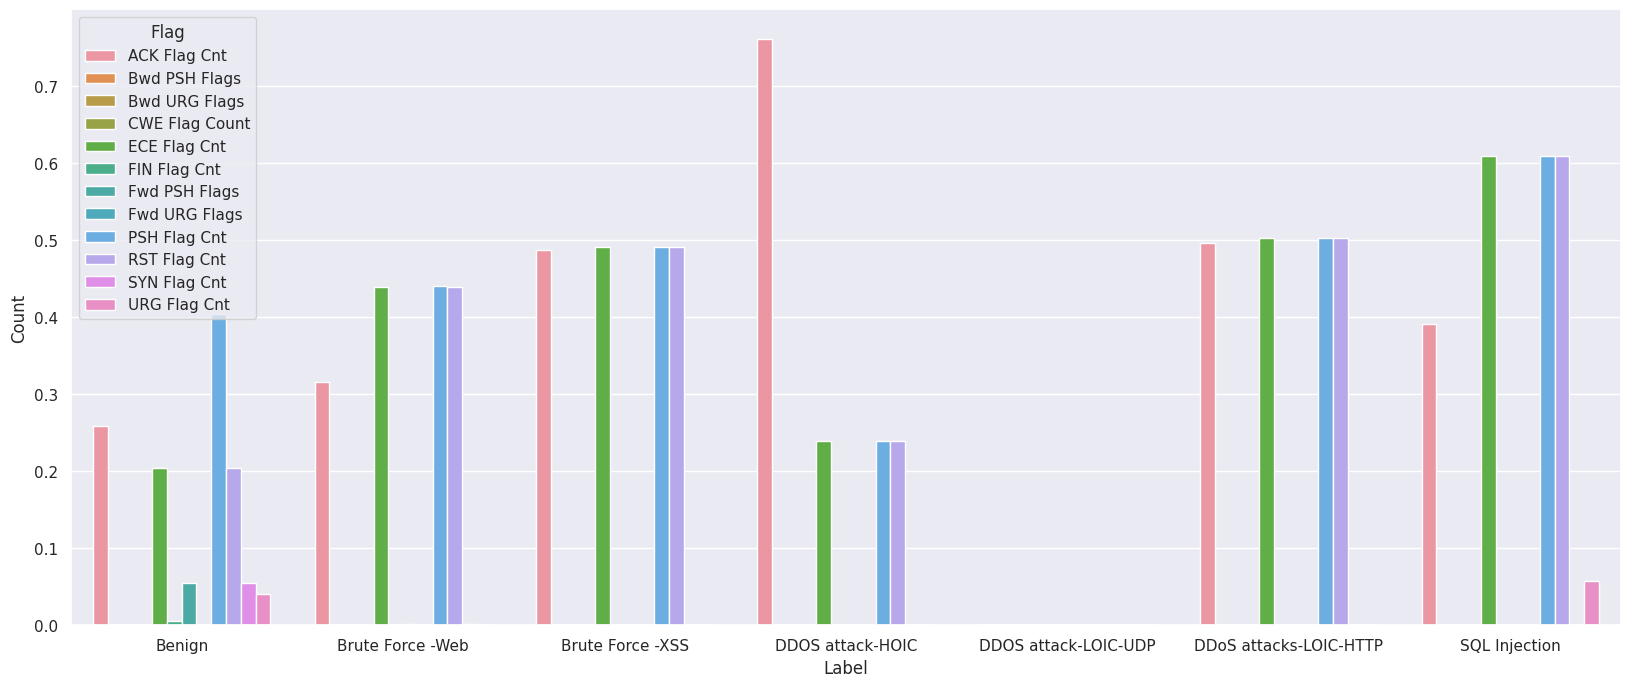

In [32]:
# Filter the columns containing the word 'flag'
flag_cols = [col for col in network_data.columns if 'Flag' in col]

# Calculate the average count of each flag for each label
avg_flag_counts = network_data.groupby('Label')[flag_cols].mean()

# Reshape the dataframe for plotting
avg_flag_counts = avg_flag_counts.reset_index().melt(id_vars='Label', var_name='Flag', value_name='Count')

# Plot the results using a barplot
sns.barplot(data=avg_flag_counts, x='Label', y='Count', hue='Flag')

## Flow Duration

Information on flow duration and idle time can help identify long-lived network connections that are potentially malicious or unwanted. 

#### Duration

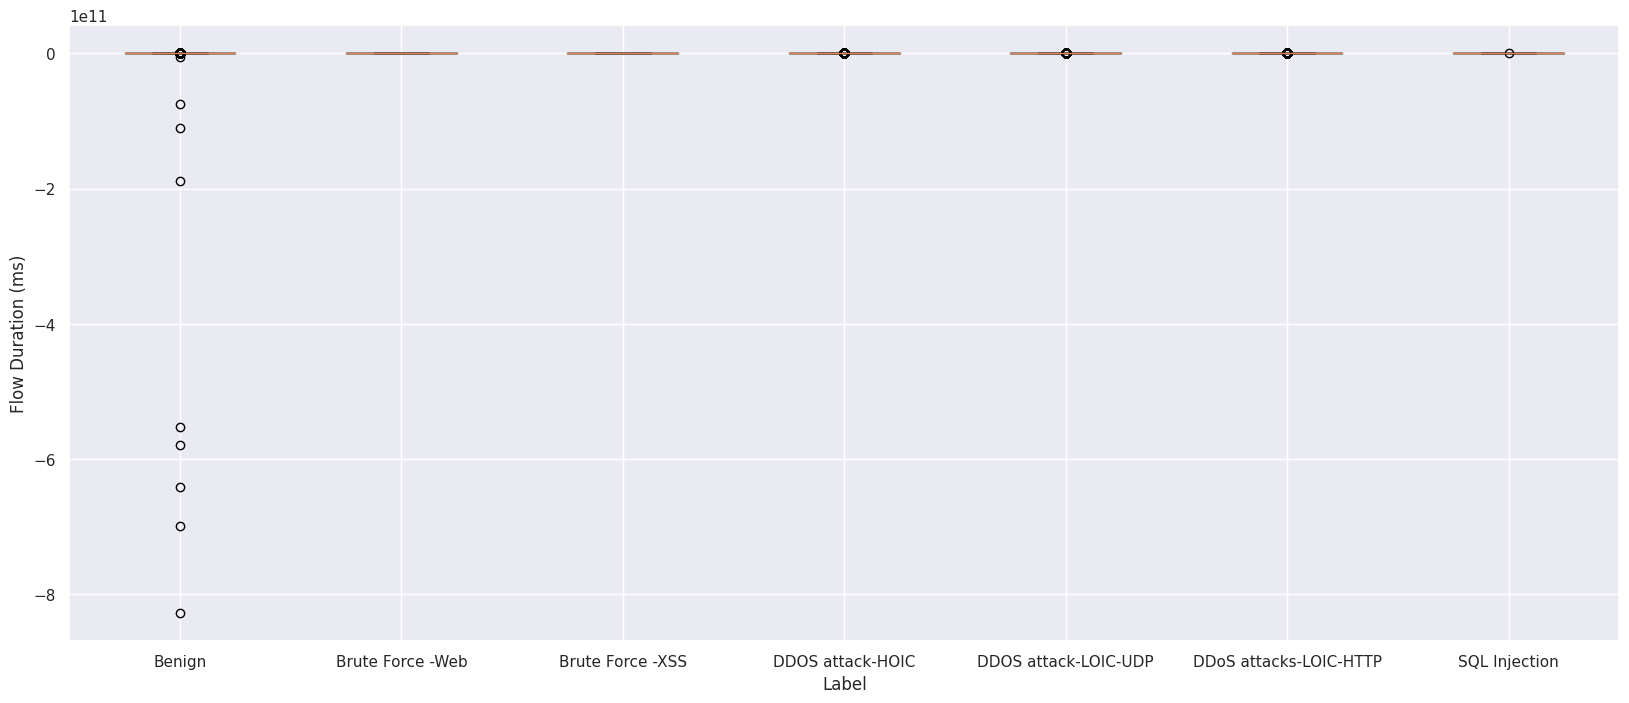

In [33]:
# Group by label and calculate the mean flow duration
label_mean_duration = network_data.groupby('Label')['Flow Duration'].mean()

# Plot the boxplot
plt.boxplot([network_data[network_data['Label'] == label]['Flow Duration'] for label in label_mean_duration.index],
            labels=label_mean_duration.index)
plt.xlabel('Label')
plt.ylabel('Flow Duration (ms)')
plt.show()

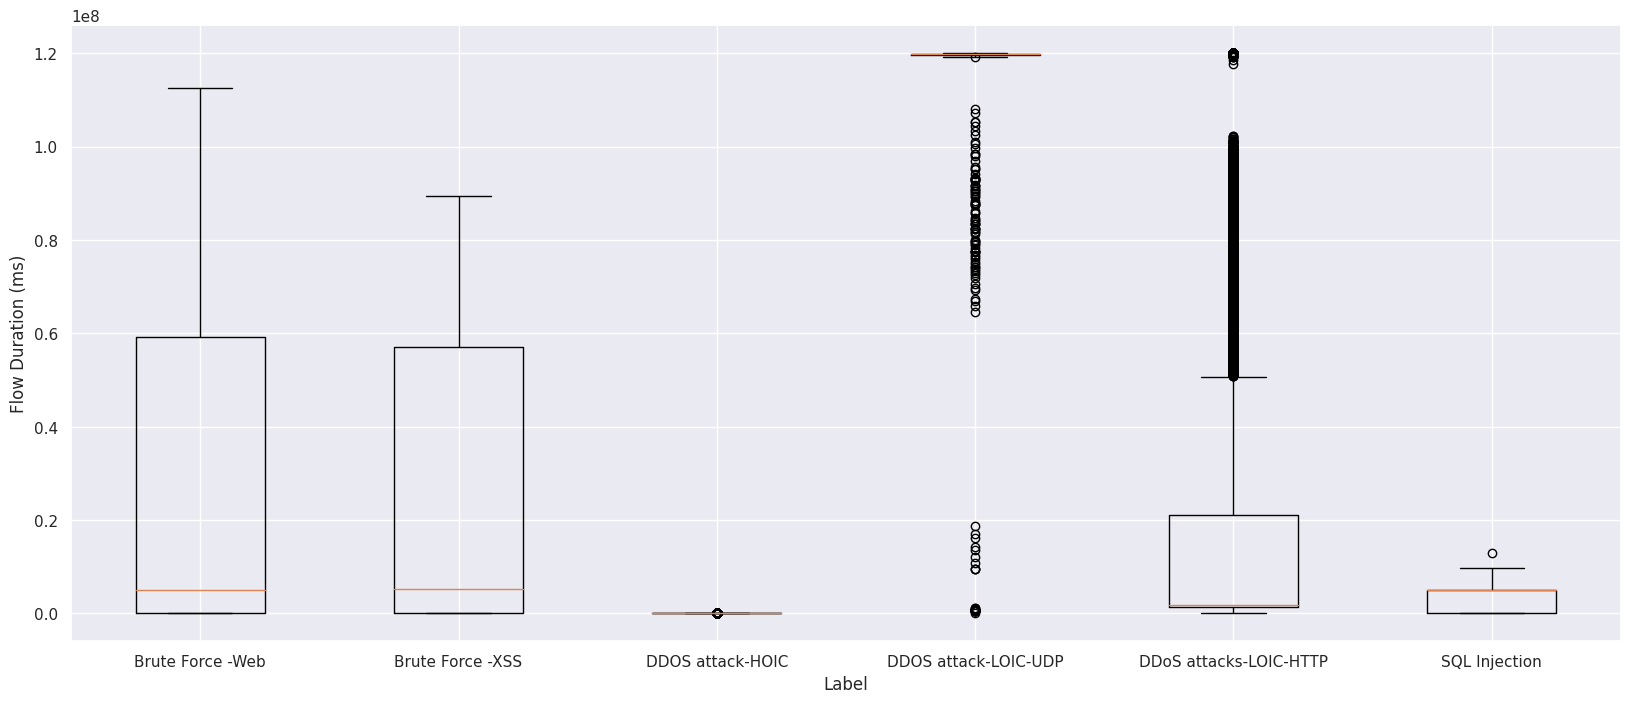

In [34]:
# Group by label and calculate the mean flow duration
label_mean_duration = network_data[network_data['Label'] != 'Benign'].groupby('Label')['Flow Duration'].mean()

# Plot the boxplot
plt.boxplot([network_data[network_data['Label'] == label]['Flow Duration'] for label in label_mean_duration.index],
            labels=label_mean_duration.index)
plt.xlabel('Label')
plt.ylabel('Flow Duration (ms)')
plt.show()

In [35]:
#Numerical Value : 
# Find the average 
avg_A = network_data['Flow Duration'].mean()
print("Average Flow Duration Overall:", avg_A)

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'Flow Duration'].mean()
avg_benign_bwd = network_data.loc[network_data['Label'] == 'Benign', 'Flow Duration'].mean()
# Print the results
print("Average of Flow Duration where 'Label' equals 'benign':", avg_benign)
print("Average of Flow Duration where 'Label' does not equal 'benign':", avg_non_benign)

Average Flow Duration Overall: 12915327.190563085
Average of Flow Duration where 'Label' equals 'benign': 13856297.975706773
Average of Flow Duration where 'Label' does not equal 'benign': 418.9952241431322


#### Idle Time

<AxesSubplot: xlabel='Label', ylabel='Idle Mean'>

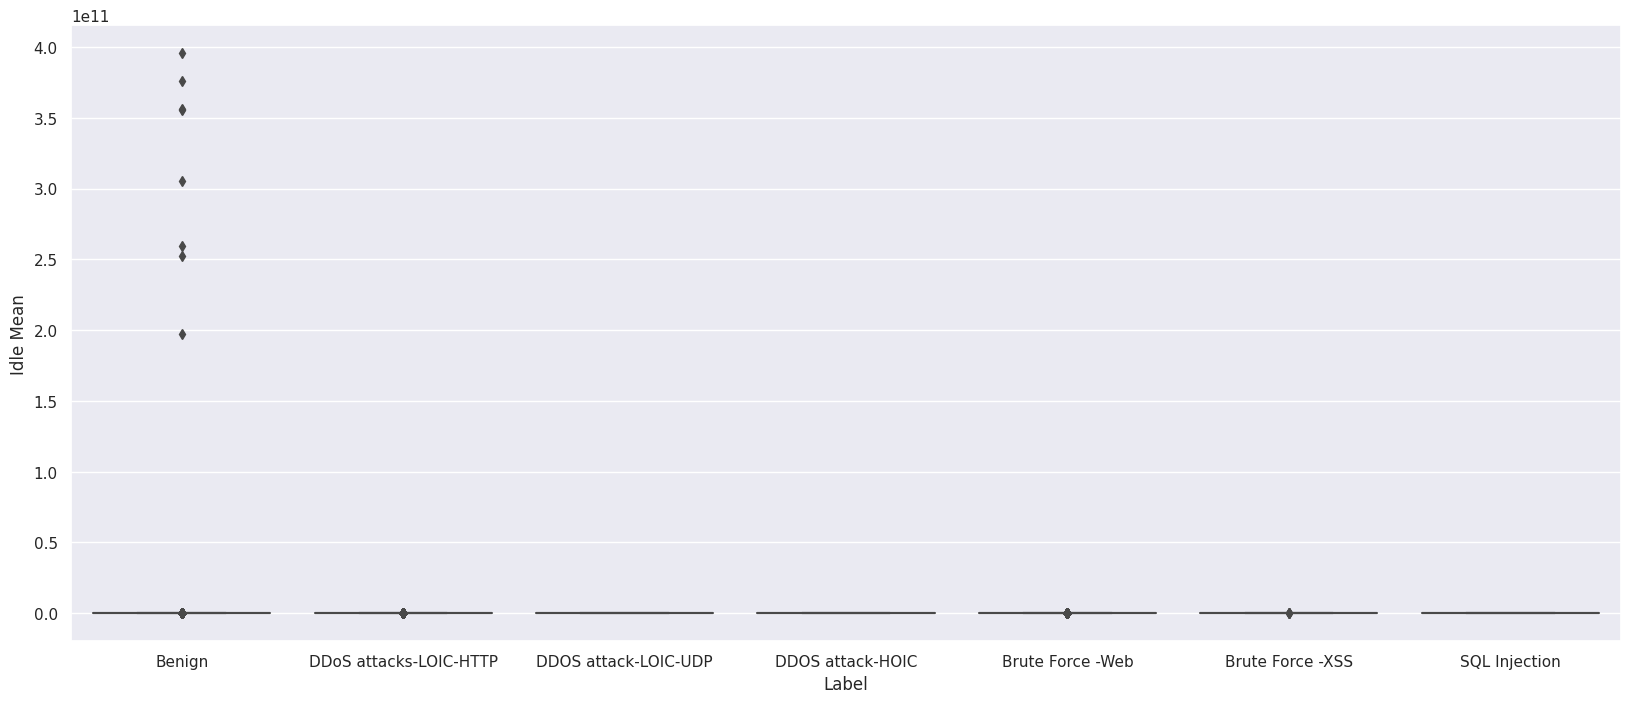

In [36]:
# create a box plot
sns.boxplot(x='Label', y='Idle Mean', data=network_data)

<AxesSubplot: xlabel='Label', ylabel='Idle Mean'>

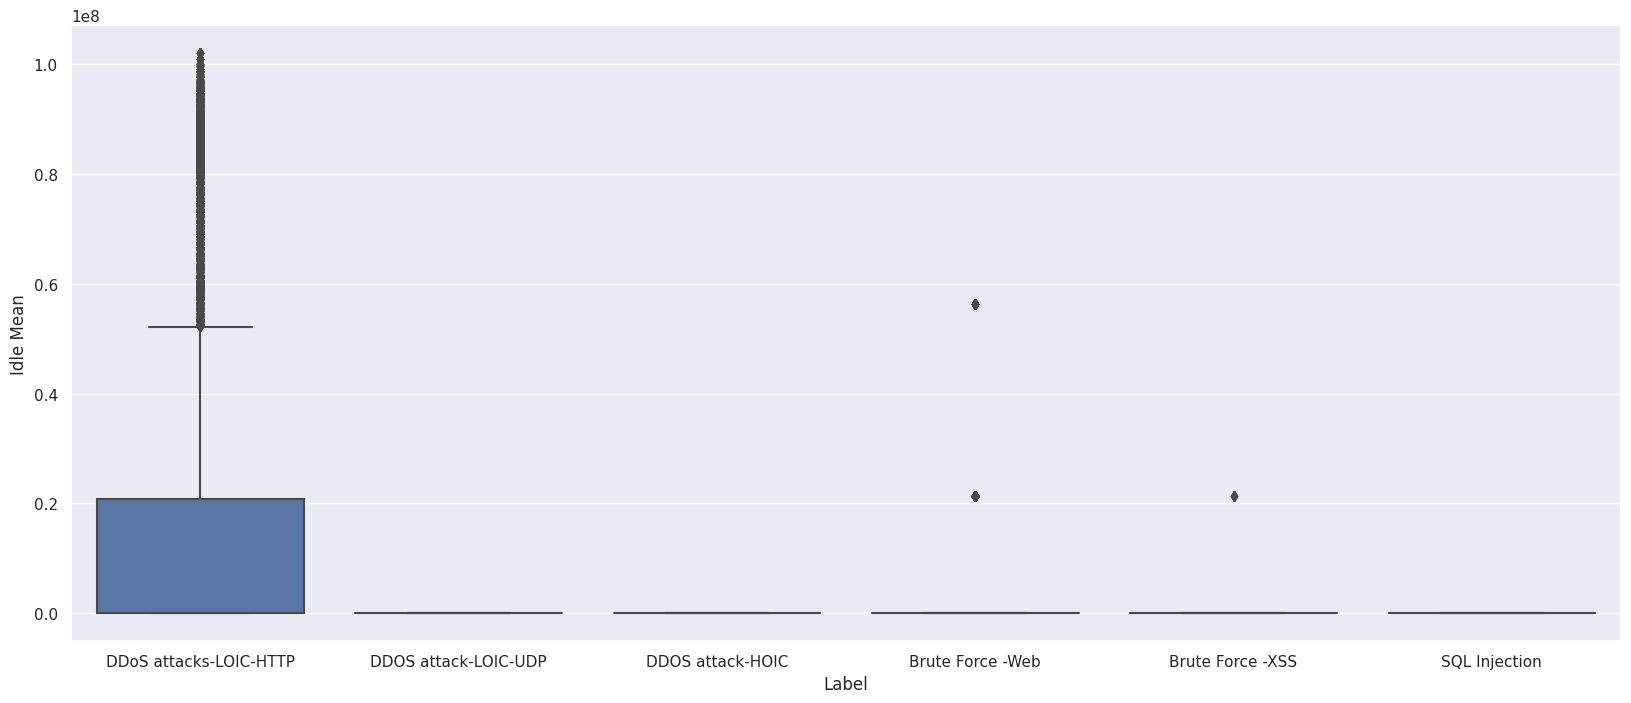

In [37]:
# create a box plot
sns.boxplot(x='Label', y='Idle Mean', data=network_data[network_data['Label'] != "Benign"])

In [38]:
#Numerical Value : 
# Find the average 
avg_A = network_data['Idle Mean'].mean()
print("Average Idle Time Overall:", avg_A)

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'Idle Mean'].mean()
avg_benign_bwd = network_data.loc[network_data['Label'] == 'Benign', 'Idle Mean'].mean()
# Print the results
print("Average of Idle Time where 'Label' equals 'benign':", avg_benign)
print("Average of Idle Time where 'Label' does not equal 'benign':", avg_non_benign)

Average Idle Time Overall: 5728378.384255963
Average of Idle Time where 'Label' equals 'benign': 5823542.657235296
Average of Idle Time where 'Label' does not equal 'benign': 418.9952241431322


## Features

features such as the flow's down/up ratio, subflow packet counts, and packet size variance can help identify and classify network traffic based on its directionality, which can be useful for monitoring and identifying suspicious behavior.

#### Down/Up Ratio

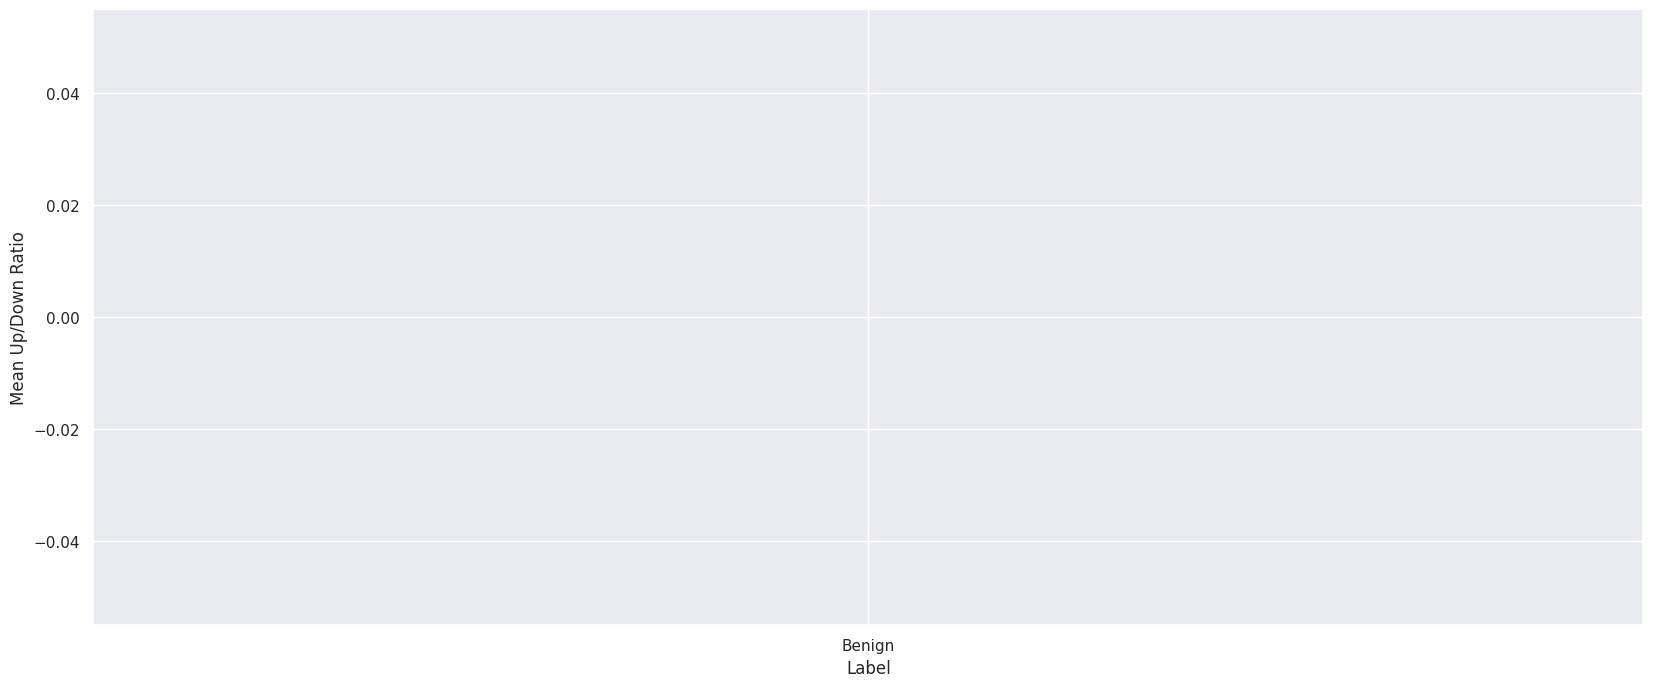

In [39]:
# Calculate the up/down ratio for each row
network_data["up_down_ratio"] = network_data["Tot Fwd Pkts"] / network_data["Tot Bwd Pkts"]

# Group the data by label and calculate the mean up/down ratio for each label
up_down_ratio_by_label = network_data.groupby("Label")["up_down_ratio"].mean()

# Plot the mean up/down ratio for each label using a bar chart
plt.bar(up_down_ratio_by_label.index, up_down_ratio_by_label.values)
plt.xlabel("Label")
plt.ylabel("Mean Up/Down Ratio")
plt.show()

#### SubFlow Packet Counts

<AxesSubplot: xlabel='Subflow Packets', ylabel='Direction'>

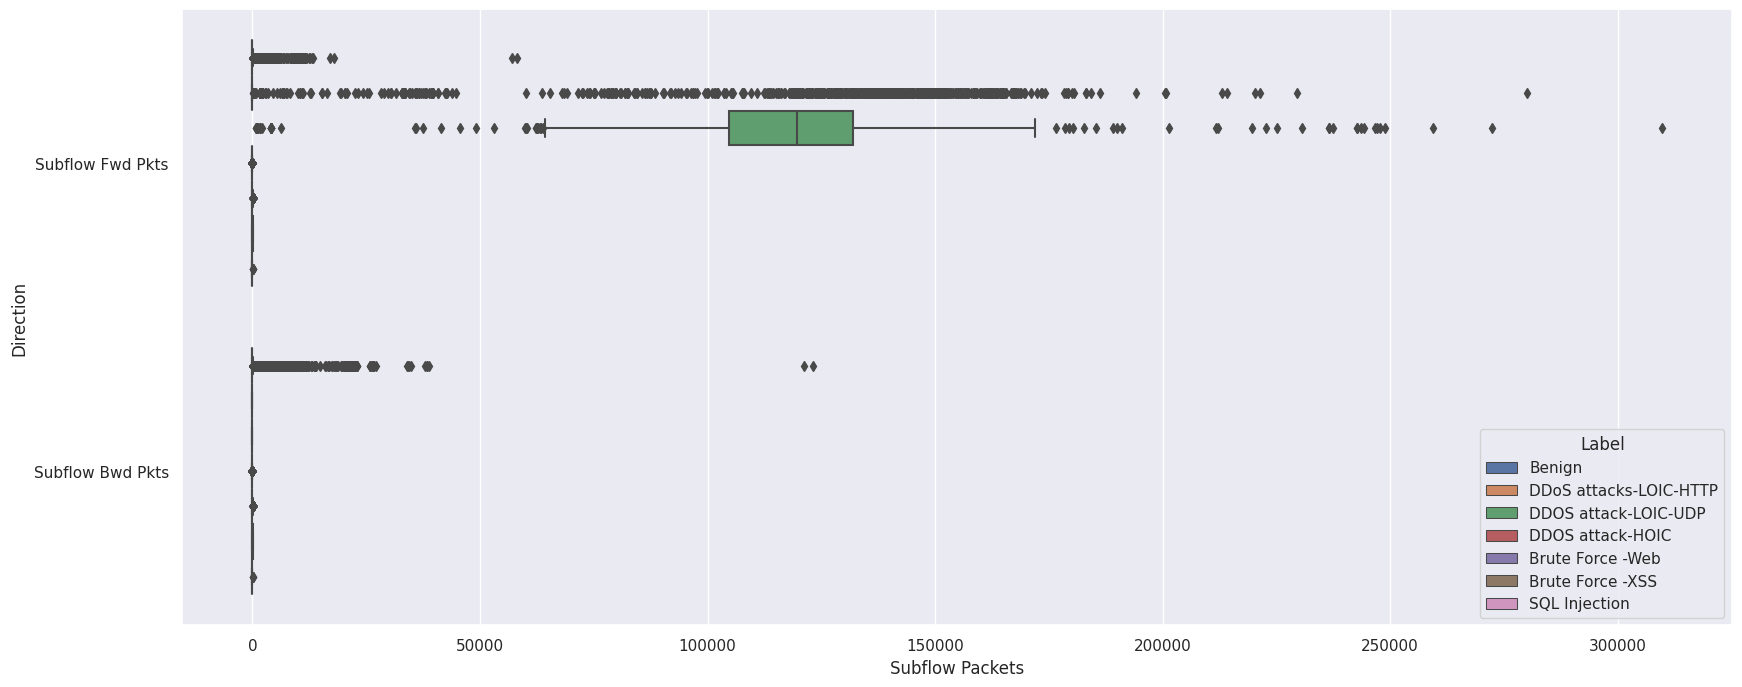

In [40]:
# Filter the data to only include the subflow packet count and label columns
subflow_df = network_data[['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Label']]

# Melt the DataFrame so that there is a separate row for each subflow packet count value
subflow_melted = pd.melt(subflow_df, id_vars=['Label'], value_vars=['Subflow Fwd Pkts', 'Subflow Bwd Pkts'], var_name='Direction', value_name='Subflow Packets')

# Create a boxplot using seaborn
sns.boxplot(x='Subflow Packets', y='Direction', hue='Label', data=subflow_melted)

In [41]:
#Numerical Value : 
# Find the average 
avg_A = network_data['Subflow Fwd Pkts'].mean()
print("Average of Forward Packet per Second in Subflows:", avg_A)

# Find the average 
avg_A = network_data['Subflow Bwd Pkts'].mean()
print("Average of Backword Packet per Second in Subflows:", avg_A)
print()

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'Subflow Fwd Pkts'].mean()
avg_benign_bwd = network_data.loc[network_data['Label'] == 'Benign', 'Subflow Bwd Pkts'].mean()

# Calculate the average of column 'Value' for rows where 'Class' does not equal 'benign'
avg_non_benign = network_data.loc[network_data['Label'] != 'Benign', 'Subflow Fwd Pkts'].mean()
avg_non_benign_bwd = network_data.loc[network_data['Label'] != 'Benign', 'Subflow Bwd Pkts'].mean()

# Print the results
print("Average of 'Subflow Fwd Pkts' where 'Label' equals 'benign':", avg_benign)
print("Average of 'Subflow Fwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign)
print("Average of 'Subflow Bwd Pkts' where 'Label' equals 'benign':", avg_benign_bwd)
print("Average of 'Subflow Bwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign_bwd)

Average of Forward Packet per Second in Subflows: 32.02856368211451
Average of Backword Packet per Second in Subflows: 6.649104017829418

Average of 'Subflow Fwd Pkts' where 'Label' equals 'benign': 6.129636347802945
Average of 'Subflow Fwd Pkts' where 'Label' does not equal 'benign': 233.2968508002065
Average of 'Subflow Bwd Pkts' where 'Label' equals 'benign': 7.31775720140327
Average of 'Subflow Bwd Pkts' where 'Label' does not equal 'benign': 1.4528007425321834


#### Packet Size Variance

<AxesSubplot: xlabel='Label', ylabel='packet_size_variance'>

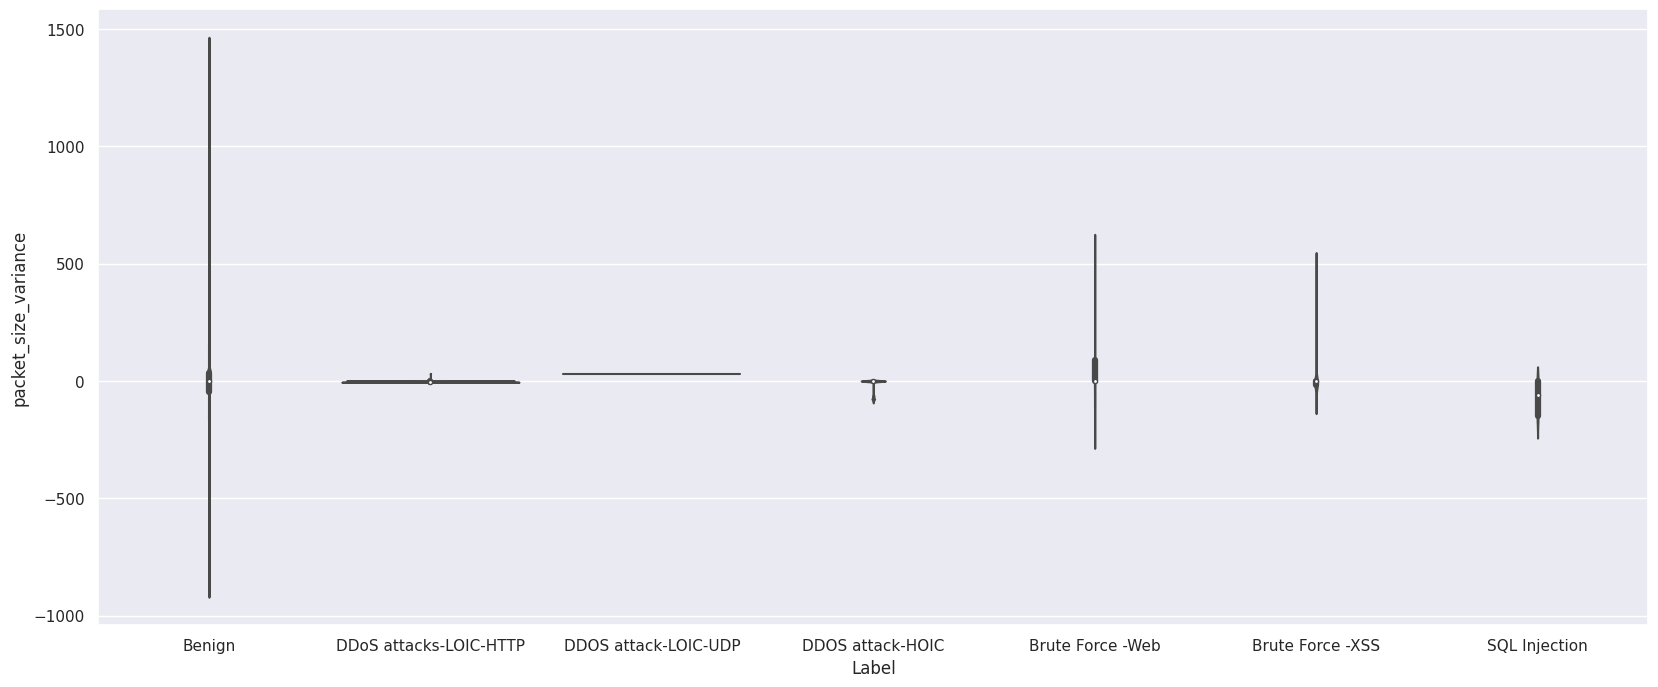

In [42]:
# Create a new column for packet size variance
network_data['packet_size_variance'] = network_data['Fwd Pkt Len Mean'] - network_data['Fwd Pkt Len Std']

# Create a violin plot of packet size variance by label
sns.violinplot(x='Label', y='packet_size_variance', data=network_data)

In [43]:
#Calculate Average Value
#Numerical Value : 
# Find the average 
avg_A = network_data['packet_size_variance'].mean()
print("Average Packet Size Variance:", avg_A)

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'packet_size_variance'].mean()
avg_non_benign = network_data.loc[network_data['Label'] != 'Benign', 'packet_size_variance'].mean()
# Print the results
print("Average of Packet Size Variance where 'Label' equals 'benign':", avg_benign)
print("Average of Packet Size Variance where 'Label' does not equal 'benign':", avg_non_benign)

Average Packet Size Variance: -16.450423486621638
Average of Packet Size Variance where 'Label' equals 'benign': -17.22081319371089
Average of Packet Size Variance where 'Label' does not equal 'benign': -10.463495350264491


<AxesSubplot: xlabel='Label', ylabel='packet_size_variance'>

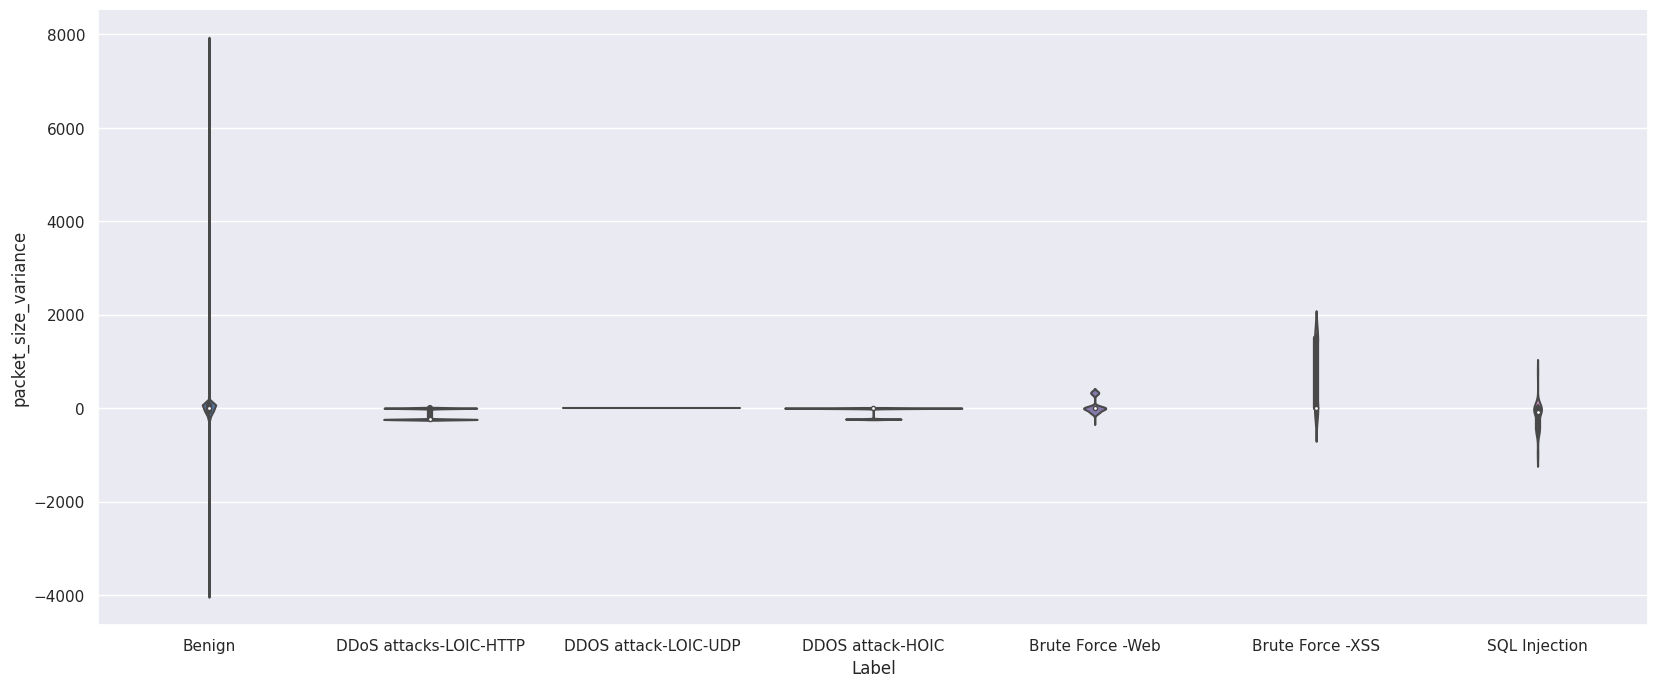

In [44]:
# Create a new column for packet size variance
network_data['packet_size_variance'] = network_data['Bwd Pkt Len Mean'] - network_data['Bwd Pkt Len Std']

# Create a violin plot of packet size variance by label
sns.violinplot(x='Label', y='packet_size_variance', data=network_data)

In [45]:
#Calculate Average Value
#Numerical Value : 
# Find the average 
avg_A = network_data['packet_size_variance'].mean()
print("Average Packet Size Variance:", avg_A)

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'packet_size_variance'].mean()
avg_non_benign = network_data.loc[network_data['Label'] != 'Benign', 'packet_size_variance'].mean()
# Print the results
print("Average of Packet Size Variance where 'Label' equals 'benign':", avg_benign)
print("Average of Packet Size Variance where 'Label' does not equal 'benign':", avg_non_benign)

Average Packet Size Variance: -19.624115479350294
Average of Packet Size Variance where 'Label' equals 'benign': -11.180794806074976
Average of Packet Size Variance where 'Label' does not equal 'benign': -85.2396781458212
